In [1]:
import numpy as np
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import time
import seaborn as sns
import datetime
from datetime import date
from bs4 import BeautifulSoup as bs

## 1. Project Overview

The aim of the following analysis is to test out the old adage "you have to spend money to make money" within the film industry. As a self-anointed cinephile who spends much of his time either watching films after work or listening to film related podcasts during work, I've always been fascinated with the industry. 

Coming from a finance role/background, the financial side of film production has always been an area that I wanted to investigate further but I never had the tools to obtain the sources of information required and to analyse it accordingly. 

This course has provided me with those missing tools and I will not let an opportunity pass to put this together both for purposes of this course and for my personal needs going forward. 

My first task in this project is to build a population of films with accurate production costs, to do this I had to pull a number of .csv files from different Kaggle sources, this was due to many only having film population from or up to certain dates which would have meant excluding certain major titles. I then reviewed them in Excel prior to loading them into Python. Once I had the population and the variable (Production Cost/Budget), I then considered what other variables would be best to compare the costs against.

Below are the other variables I aim to compare production costs against:
- Worldwide Gross Amounts:
    - Does spending more make more?
- IMDB User Ratings:
    - Does spending more increase audience enjoyment?
- Rotten Tomato Critic Scores:
    - Does spending more increase critical reception?

Using these three variables, I can expand on my analysis and see if there is a genuine correlation between production cost and the other variables along with other insights that will appear as I analyse.

## 2. Data Loading and Cleansing

The first step is to build up a population of films, I have sourced eight .csv files from Kaggle most of which provide a list of film titles, release dates/years, production costs and worldwide gross amounts. Only some of the files contain all of those variables so, I must build a Dataframes (DF) for production costs and worldwide grosses separately cleanse them removing duplicates and blanks before joining them as one. 

But first I should load the files:

## Loading the Film Production/Gross Files:

In [2]:
movie_filenames = os.listdir("C:/Users/New User/Documents/UCD/Assignment/assignment_files/csv_downloads/movie_data/") 

# lists the csv files in my folder

In [3]:
def extract_name_files(text): # this removes the .csv from the name the files in the folder
    name_file = text.strip('.csv').lower()
    return name_file

In [4]:
names_of_movie_files = list(map(extract_name_files,movie_filenames)) 

# creates the list that to be used to name the dataframes from the filenames

In [5]:
for i in range(0,len(names_of_movie_files)): # saves each csv in a dataframe structure
    exec(names_of_movie_files[i] + " =  pd.read_csv('C:/Users/New User/Documents/UCD/Assignment/assignment_files/csv_downloads/movie_data/'+movie_filenames[i])")

In [6]:
# I will then use the below to display the dataframes currently loaded:
%whos DataFrame

Variable                 Type         Data/Info
-----------------------------------------------
all_time_worldwide_bo    DataFrame         Rank  Year          <...>n\n[583 rows x 6 columns]
blockbuster              DataFrame         release_year  rank_i<...>\n[430 rows x 13 columns]
movie_industry_dataset   DataFrame                             <...>n[7633 rows x 15 columns]
tgm_bo_summary           DataFrame         Rank                <...>\n[1000 rows x 5 columns]
tmdb_movie               DataFrame             budget          <...>n[4802 rows x 20 columns]
tmds_movies_metadata     DataFrame           adult             <...>[45436 rows x 24 columns]
top_grossing_film        DataFrame             Release_Type    <...>\n[1000 rows x 7 columns]
top_movies_data          DataFrame         Release Date Movie T<...>\n[3896 rows x 5 columns]


## Loading the Film Rating Files:

Repeating the same steps as before but for the film rating files in a different folder, however this time I can reuse the extract_name_files(text) function defined earlier which means one less step:

In [7]:
rating_filenames = os.listdir("C:/Users/New User/Documents/UCD/Assignment/assignment_files/csv_downloads/rating_data/")

In [8]:
names_of_rating_files = list(map(extract_name_files,rating_filenames))

In [9]:
for i in range(0,len(names_of_rating_files)):
    exec(names_of_rating_files[i] + " =  pd.read_csv('C:/Users/New User/Documents/UCD/Assignment/assignment_files/csv_downloads/rating_data/'+rating_filenames[i])")

In [10]:
%whos DataFrame

Variable                 Type         Data/Info
-----------------------------------------------
all_time_worldwide_bo    DataFrame         Rank  Year          <...>n\n[583 rows x 6 columns]
blockbuster              DataFrame         release_year  rank_i<...>\n[430 rows x 13 columns]
imdb_movie_metadata      DataFrame          color      director<...>n[5043 rows x 28 columns]
imdb_top_1000            DataFrame                             <...>n[1000 rows x 16 columns]
movie_industry_dataset   DataFrame                             <...>n[7633 rows x 15 columns]
rotten_tomatoes_movie    DataFrame                            r<...>[17712 rows x 22 columns]
tgm_bo_summary           DataFrame         Rank                <...>\n[1000 rows x 5 columns]
tmdb_movie               DataFrame             budget          <...>n[4802 rows x 20 columns]
tmds_movies_metadata     DataFrame           adult             <...>[45436 rows x 24 columns]
top_grossing_film        DataFrame             Release_Typ

The number of files loaded as DataFrames has increased by the 3 rating files

To explore the contents of these DataFrames, I will create a new DataFrame and then use a loop to present the info of each of the loaded DataFrame

In [11]:
file_names = pd.DataFrame({'file': ['all_time_worldwide_bo','blockbuster','imdb_movie_metadata','imdb_top_1000','movie_industry_dataset',
                                    'rotten_tomatoes_movie','tgm_bo_summary','tmdb_movie','tmds_movies_metadata',
                                    'top_grossing_film','top_movies_data']})

In [12]:
for index, row in file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.info())')

all_time_worldwide_bo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     583 non-null    int64 
 1   Year                     583 non-null    int64 
 2   Movie                    583 non-null    object
 3   WorldwideBox Office      583 non-null    object
 4   DomesticBox Office       576 non-null    object
 5   InternationalBox Office  583 non-null    object
dtypes: int64(2), object(4)
memory usage: 27.5+ KB
None
blockbuster
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_year          430 non-null    int64  
 1   rank_in_year          430 non-null    int64  
 2   imdb_rating           430 non-null    float64
 3   mpaa_rating      

The above provides me with an overview of the DFs, I can see all columns within each DF and the data type contained within each column. In building my population, I will require columns containing:
- Film Title
    - For Obvious Reasons
- Release Date or Release Year
    - While having a full release date would be perfect as it would allow analysis by month and even day, I would settle for release year if it means getting a bigger population. 
- Production Costs Amount
    - The entire report hinges on the presence and accuracy of production costs for each film. 

I will start by building this population, extracting each of these columns from the files where all three columns are present, cleanse the data in each new version of the DF, amend the column headings to ensure they are uniformed in each new DF before stacking them to form a production cost population. I will then repeat the steps for the files containing gross box office figures.  


## Analysis of DataFrames:

Excluding the three film rating DFs (imdb_movie_metadata, imdb_top_1000 and rotten_tomatoes_movie) and the DFs which have no production costs or budgets (all_time_worldwide_bo, tgm_bo_summary and top_grossing_film), I am left with the following DFs and the relevant columns:
- blockbuster
    - release_year
    - film_title
    - film_budget
    - length_in_min
        - I am including the length to filter out movies 60 minutes or less where possible
- movie_industry_dataset
    - name
    - year
    - budget
    - runtime
- tmdb_movie
    - budget
    - release_date
    - runtime
    - title
- tmds_movies_metadata
    - budget
    - release_date
    - title
    - runtime
- top_movies_data
    - Release Date
    - Movie Title
    - Production Budget
    
I will use the column names from the blockbuster DF and change the other columns names to match those ones. In addition to the column name changes, the following steps will be taken to cleanse each DF:
- Filter out films 60 minutes and under
- Filter out and rows where the production costs are blanks
- Remove duplicates based on these two criteria in this order:
    - film_title & release_year
    - film_title & film_budget
        - This should remove any potential duplicates where multiple versions of the same title appear but should also retain films with identical titles produced in different years, remakes being a prime example of this. 

The files should be ready to be appended on top of each other at this point. 

The next stage will be to pull together the DFs containing the film grossing data which from the loaded DFs will be along with the columns required to join with the production DFs:
- all_time_worldwide_bo
    - Year
    - Movie
    - WorldwideBox Office
- blockbuster
    - release_year 
    - film_title
    - worldwide_gross   
- movie_industry_dataset
    - name
    - year
    - gross
- tgm_bo_summary
    - Title
    - Lifetime Gross
    - Year
- tmdb_movie
    - release_date
    - revenue
    - title                 
- tmds_movies_metadata
    - release_date
    - revenue
    - title
- top_grossing_film
    - Movie_Name
    - Lifetime Gross
    - Year  
- top_movies_data
    - Release Date
    - Movie Title
    - Worldwide Gross


In [13]:
# Before I begin to subset the files, I will cleanse some of the data based on the data type information provided above. I can see that budget columns in the Blockbuster and TMDS DFs are not numeric data types.

# The loop below will print the first two rows of each file to show me potential reasons for the issues with the data types.

for index, row in file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.head(2))')

all_time_worldwide_bo
   Rank  Year              Movie WorldwideBox Office DomesticBox Office  \
0     1  2009             Avatar      $2,845,899,541       $760,507,625   
1     2  2019  Avengers: Endgame      $2,797,800,564       $858,373,000   

  InternationalBox Office  
0          $2,085,391,916  
1          $1,939,427,564  
blockbuster
   release_year  rank_in_year  imdb_rating mpaa_rating         film_title  \
0          2019             1          8.5       PG-13  Avengers: Endgame   
1          2019             2          7.0          PG      The Lion King   

   film_budget  length_in_min domestic_distributor worldwide_gross  \
0  356,000,000            181         Walt Disney    2,797,800,564   
1  260,000,000            118         Walt Disney    1,656,943,394   

  domestic_gross    genre_1    genre_2 genre_3  
0    858,373,000     Action  Adventure   Drama  
1    543,638,043  Animation  Adventure   Drama  
imdb_movie_metadata
   color   director_name  num_critic_for_revie

In [14]:
# based on the above, the following changes are required for the data to become usable:
# remove commas and currency signs from columns where required
all_time_worldwide_bo['WorldwideBox Office']=all_time_worldwide_bo['WorldwideBox Office'].str.replace(',','')
all_time_worldwide_bo['WorldwideBox Office']=all_time_worldwide_bo['WorldwideBox Office'].str.replace('$','')
blockbuster['film_budget']=blockbuster['film_budget'].str.replace(',','')
blockbuster['worldwide_gross']=blockbuster['worldwide_gross'].str.replace(',','')
tgm_bo_summary['Lifetime Gross']=tgm_bo_summary['Lifetime Gross'].str.replace(',','')
tgm_bo_summary['Lifetime Gross']=tgm_bo_summary['Lifetime Gross'].str.replace('$','')

# change the data types of the columns to a numeric type
all_time_worldwide_bo['WorldwideBox Office'] = pd.to_numeric(all_time_worldwide_bo['WorldwideBox Office'])
blockbuster['film_budget'] = pd.to_numeric(blockbuster['film_budget'])
blockbuster['worldwide_gross'] = pd.to_numeric(blockbuster['worldwide_gross'])
tgm_bo_summary['Lifetime Gross'] = pd.to_numeric(tgm_bo_summary['Lifetime Gross'])
tmds_movies_metadata['budget'] = pd.to_numeric(tmds_movies_metadata['budget'])
tmds_movies_metadata['revenue'] = pd.to_numeric(tmds_movies_metadata['revenue'])
top_movies_data['Worldwide Gross'] = pd.to_numeric(top_movies_data['Worldwide Gross'])

In [15]:
# the below info will show the change has taken place for the budget data for both DFs

for index, row in file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.info())')

all_time_worldwide_bo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     583 non-null    int64 
 1   Year                     583 non-null    int64 
 2   Movie                    583 non-null    object
 3   WorldwideBox Office      583 non-null    int64 
 4   DomesticBox Office       576 non-null    object
 5   InternationalBox Office  583 non-null    object
dtypes: int64(3), object(3)
memory usage: 27.5+ KB
None
blockbuster
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_year          430 non-null    int64  
 1   rank_in_year          430 non-null    int64  
 2   imdb_rating           430 non-null    float64
 3   mpaa_rating      

To uniform the columns, I will rename, where required, to the following:
- release_year (or date)
- film_title
- film_budget
- film_runtime
- film_gross

In [16]:
## Changing the column names in each DF as described:

all_time_worldwide_bo.rename(columns={'Year': 'release_year','Movie': 'film_title', 'WorldwideBox Office': 'film_gross'}, inplace=True)

blockbuster.rename(columns={'length_in_min': 'film_runtime','worldwide_gross': 'film_gross'}, inplace=True)

imdb_movie_metadata.rename(columns={'movie_title': 'film_title','title_year': 'release_year'}, inplace=True)

imdb_top_1000.rename(columns={'Series_Title': 'film_title','IMDB_Rating': 'imdb_score', 'Released_Year':'release_year'}, inplace=True)

movie_industry_dataset.rename(columns={'year': 'release_year', 'name': 'film_title',
                                          'budget': 'film_budget', 'runtime': 'film_runtime','gross': 'film_gross'}, inplace=True)

rotten_tomatoes_movie.rename(columns={'movie_title': 'film_title','original_release_date': 'release_date'}, inplace=True)

tgm_bo_summary.rename(columns={'Title': 'film_title','Lifetime Gross': 'film_gross', 'Year': 'release_year'}, inplace=True)

tmdb_movie.rename(columns={'title': 'film_title','budget': 'film_budget', 'runtime': 'film_runtime','revenue': 'film_gross'}, inplace=True)

tmds_movies_metadata.rename(columns={'title': 'film_title','budget': 'film_budget', 
                                     'runtime': 'film_runtime','revenue': 'film_gross'}, inplace=True)

top_grossing_film.rename(columns={'Year': 'release_year', 'Movie_Name': 'film_title','Lifetime Gross': 'film_gross'}, inplace=True)

top_movies_data.rename(columns={'Release Date': 'release_date', 'Movie Title': 'film_title',
                                          'Production Budget': 'film_budget', 'Worldwide Gross': 'film_gross'}, inplace=True)

In [17]:
## where a release date is in the file, most of them are not formatted as date. The below will change this.

tmdb_movie['release_date'] = pd.to_datetime(tmdb_movie['release_date'])
tmds_movies_metadata['release_date'] = pd.to_datetime(tmds_movies_metadata['release_date'])
top_movies_data['release_date'] = pd.to_datetime(top_movies_data['release_date'])
rotten_tomatoes_movie['release_date'] = pd.to_datetime(rotten_tomatoes_movie['release_date'])

In [18]:
## extracting the year from the release date to ensure each of the DFs have a release year

tmdb_movie['release_year'] = pd.DatetimeIndex(tmdb_movie['release_date']).year
tmds_movies_metadata['release_year'] = pd.DatetimeIndex(tmds_movies_metadata['release_date']).year
top_movies_data['release_year'] = pd.DatetimeIndex(top_movies_data['release_date']).year
rotten_tomatoes_movie['release_year'] = pd.DatetimeIndex(rotten_tomatoes_movie['release_date']).year

In [19]:
## capitalising the film titles to reduce the risk of case sensitive issues when joining data later

all_time_worldwide_bo['film_title'] = all_time_worldwide_bo['film_title'].str.upper()
blockbuster['film_title'] = blockbuster['film_title'].str.upper()
imdb_movie_metadata['film_title'] = imdb_movie_metadata['film_title'].str.upper()
imdb_top_1000['film_title'] = imdb_top_1000['film_title'].str.upper()
movie_industry_dataset['film_title'] = movie_industry_dataset['film_title'].str.upper()
rotten_tomatoes_movie['film_title'] = rotten_tomatoes_movie['film_title'].str.upper()
tgm_bo_summary['film_title'] = tgm_bo_summary['film_title'].str.upper()
tmdb_movie['film_title'] = tmdb_movie['film_title'].str.upper()
tmds_movies_metadata['film_title'] = tmds_movies_metadata['film_title'].str.upper()
top_grossing_film['film_title'] = top_grossing_film['film_title'].str.upper()
top_movies_data['film_title'] = top_movies_data['film_title'].str.upper()

In [20]:
## removing any potential spaces before or after the film_title is a potential necessity as these can lead to joining issues down the line:

all_time_worldwide_bo['film_title'] = all_time_worldwide_bo['film_title'].str.strip()
blockbuster['film_title'] = blockbuster['film_title'].str.strip()
imdb_movie_metadata['film_title'] = imdb_movie_metadata['film_title'].str.strip()
imdb_top_1000['film_title'] = imdb_top_1000['film_title'].str.strip()
movie_industry_dataset['film_title'] = movie_industry_dataset['film_title'].str.strip()
rotten_tomatoes_movie['film_title'] = rotten_tomatoes_movie['film_title'].str.strip()
tgm_bo_summary['film_title'] = tgm_bo_summary['film_title'].str.strip()
tmdb_movie['film_title'] = tmdb_movie['film_title'].str.strip()
tmds_movies_metadata['film_title'] = tmds_movies_metadata['film_title'].str.strip()
top_grossing_film['film_title'] = top_grossing_film['film_title'].str.strip()
top_movies_data['film_title'] = top_movies_data['film_title'].str.strip()

In [21]:
## prior to removing duplicates, there are a number characters which may cause issues across the different DFs

replacements = {'-' : ' ',':' : ' ','...' : '','?' : '','!' : '','/' : '','\\' : '','&' : '','.' : '','PAJAMAS' : 'PYJAMAS'}

all_time_worldwide_bo['film_title'].replace(replacements, inplace=True)
blockbuster['film_title'].replace(replacements, inplace=True)
imdb_movie_metadata['film_title'].replace(replacements, inplace=True)
imdb_top_1000['film_title'].replace(replacements, inplace=True)
movie_industry_dataset['film_title'].replace(replacements, inplace=True)
rotten_tomatoes_movie['film_title'].replace(replacements, inplace=True)
tgm_bo_summary['film_title'].replace(replacements, inplace=True)
tmdb_movie['film_title'].replace(replacements, inplace=True)
tmds_movies_metadata['film_title'].replace(replacements, inplace=True)
top_grossing_film['film_title'].replace(replacements, inplace=True)
top_movies_data['film_title'].replace(replacements, inplace=True)

In [22]:
## the next step is to remove any potential duplicates in each of the DFs before creating the combined files, beginning with film_title and release year:

all_time_worldwide_bo.drop_duplicates(subset=['film_title','release_year'], inplace =True)
blockbuster.drop_duplicates(subset=['film_title','release_year'], inplace =True)
imdb_movie_metadata.drop_duplicates(subset=['film_title','release_year'], inplace =True)
imdb_top_1000.drop_duplicates(subset=['film_title','release_year'], inplace =True)
movie_industry_dataset.drop_duplicates(subset=['film_title','release_year'], inplace =True)
rotten_tomatoes_movie.drop_duplicates(subset=['film_title','release_year'], inplace =True)
tgm_bo_summary.drop_duplicates(subset=['film_title','release_year'], inplace =True)
tmdb_movie.drop_duplicates(subset=['film_title','release_year'], inplace =True)
tmds_movies_metadata.drop_duplicates(subset=['film_title','release_year'], inplace =True)
top_grossing_film.drop_duplicates(subset=['film_title','release_year'], inplace =True)
top_movies_data.drop_duplicates(subset=['film_title','release_year'], inplace =True)

In [23]:
## then remove duplicates based on film_title and either film_budget or film_gross:

all_time_worldwide_bo.drop_duplicates(subset=['film_title','film_gross'], inplace =True)
blockbuster.drop_duplicates(subset=['film_title','film_budget'], inplace =True)
movie_industry_dataset.drop_duplicates(subset=['film_title','film_budget'], inplace =True)
tgm_bo_summary.drop_duplicates(subset=['film_title','film_gross'], inplace =True)
tmdb_movie.drop_duplicates(subset=['film_title','film_budget'], inplace =True)
tmds_movies_metadata.drop_duplicates(subset=['film_title','film_budget'], inplace =True)
top_grossing_film.drop_duplicates(subset=['film_title','film_gross'], inplace =True)
top_movies_data.drop_duplicates(subset=['film_title','film_budget'], inplace =True)

In [24]:
## removing rows containing blanks in the same columns as I removed duplicates as these are key areas

all_time_worldwide_bo.dropna(subset=['film_title','release_year'], inplace =True)
blockbuster.dropna(subset=['film_title','release_year'], inplace =True)
imdb_movie_metadata.dropna(subset=['film_title','release_year'], inplace =True)
imdb_top_1000.dropna(subset=['film_title','release_year'], inplace =True)
movie_industry_dataset.dropna(subset=['film_title','release_year'], inplace =True)
rotten_tomatoes_movie.dropna(subset=['film_title','release_year'], inplace =True)
tgm_bo_summary.dropna(subset=['film_title','release_year'], inplace =True)
tmdb_movie.dropna(subset=['film_title','release_year'], inplace =True)
tmds_movies_metadata.dropna(subset=['film_title','release_year'], inplace =True)
top_grossing_film.dropna(subset=['film_title','release_year'], inplace =True)
top_movies_data.dropna(subset=['film_title','release_year'], inplace =True)

In [25]:
## then removing rows containing blanks based on film_title and either film_budget or film_gross:

all_time_worldwide_bo.dropna(subset=['film_title','film_gross'], inplace =True)
blockbuster.dropna(subset=['film_title','film_budget'], inplace =True)
movie_industry_dataset.dropna(subset=['film_title','film_budget'], inplace =True)
tgm_bo_summary.dropna(subset=['film_title','film_gross'], inplace =True)
tmdb_movie.dropna(subset=['film_title','film_budget'], inplace =True)
tmds_movies_metadata.dropna(subset=['film_title','film_budget'], inplace =True)
top_grossing_film.dropna(subset=['film_title','film_gross'], inplace =True)
top_movies_data.dropna(subset=['film_title','film_budget'], inplace =True)

In [26]:
## to reduce the populations even futher, I will remove movies with a run time of less than 60 minutes as I would classify these as shorts

blockbuster = blockbuster[blockbuster['film_runtime'] >= 60]
movie_industry_dataset = movie_industry_dataset[movie_industry_dataset['film_runtime'] >= 60]
tmdb_movie = tmdb_movie[tmdb_movie['film_runtime'] >= 60]
tmds_movies_metadata = tmds_movies_metadata[tmds_movies_metadata['film_runtime'] >= 60]

In [27]:
## in addition to the previous, I will also remove films with a runtime greater than 4 hours as these are most likely mini-series or a Russian epic

blockbuster = blockbuster[blockbuster['film_runtime'] < 240]
movie_industry_dataset = movie_industry_dataset[movie_industry_dataset['film_runtime'] < 240]
tmdb_movie = tmdb_movie[tmdb_movie['film_runtime'] < 240]
tmds_movies_metadata = tmds_movies_metadata[tmds_movies_metadata['film_runtime'] < 240]

In [28]:
## I will also remove any film which had a film_budget of zero:

blockbuster = blockbuster[blockbuster['film_budget'] > 0]
movie_industry_dataset = movie_industry_dataset[movie_industry_dataset['film_budget'] > 0]
tmdb_movie = tmdb_movie[tmdb_movie['film_budget'] > 0]
tmds_movies_metadata = tmds_movies_metadata[tmds_movies_metadata['film_budget'] > 0]
top_movies_data = top_movies_data[top_movies_data['film_budget'] > 0]

In [29]:
## checking now to see if there has been any initial reduction in numbers from the work done in the drop duplicates and drop NA

for index, row in file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.info())')

all_time_worldwide_bo
<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     583 non-null    int64 
 1   release_year             583 non-null    int64 
 2   film_title               583 non-null    object
 3   film_gross               583 non-null    int64 
 4   DomesticBox Office       576 non-null    object
 5   InternationalBox Office  583 non-null    object
dtypes: int64(3), object(3)
memory usage: 31.9+ KB
None
blockbuster
<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_year          430 non-null    int64  
 1   rank_in_year          430 non-null    int64  
 2   imdb_rating           430 non-null    float64
 3   mpaa_rating      

Based on the new figures, below are some of the more notable changes in film title populations within the DFs are:
   - TMDS reduced by 36,803 titles (45,441 down to 8,638)
   - IMDB Metadata reduced by 230 titles (5,043 down to 4,813)
   - Movie Industry reduced by 2,177 titles (7,633 down to 5,456)
   - Rotten Tomatoes reduced by 1,168 titles (17,712 down to 16,544)
   - TMDB reduced by 1,047 titles (4,803 down to 3,756)

## Creating the combined files

## 3. Production Files

The first step is to build out a file consisting of the dataframes that possess film_titles, release_year, film_budgets and where possible release_date and film runtime. This will create the population that I will join other combined dataframes to.

In [30]:
#Create new DFs with only the columns required - not all DFs contain the same columns so differing subset groups are required:
columns_to_subset1 = ['release_year', 'film_title', 'film_budget','film_runtime']
columns_to_subset2 = ['release_year', 'release_date', 'film_title', 'film_budget','film_runtime']
columns_to_subset3 = ['release_year', 'release_date', 'film_title', 'film_budget']
blockbuster_PD = blockbuster[columns_to_subset1]
movie_industry_dataset_PD = movie_industry_dataset[columns_to_subset1]
tmdb_movie_PD = tmdb_movie[columns_to_subset2]
tmds_movies_metadata_PD = tmds_movies_metadata[columns_to_subset2]
top_movies_data_PD = top_movies_data[columns_to_subset3]

In [31]:
# create a dictionary of file names to make looping easier:

production_file_names = pd.DataFrame({'file': ['blockbuster_PD','movie_industry_dataset_PD','tmdb_movie_PD','tmds_movies_metadata_PD',
                                    'top_movies_data_PD']})

In [32]:
for index, row in production_file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.info())')

blockbuster_PD
<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 429
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_year  430 non-null    int64 
 1   film_title    430 non-null    object
 2   film_budget   430 non-null    int64 
 3   film_runtime  430 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 16.8+ KB
None
movie_industry_dataset_PD
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5456 entries, 0 to 7631
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  5456 non-null   int64  
 1   film_title    5456 non-null   object 
 2   film_budget   5456 non-null   float64
 3   film_runtime  5456 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 213.1+ KB
None
tmdb_movie_PD
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 4798
Data columns (total 5 colu

In [33]:
for index, row in production_file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.head(2))')

blockbuster_PD
   release_year         film_title  film_budget  film_runtime
0          2019  AVENGERS: ENDGAME    356000000           181
1          2019      THE LION KING    260000000           118
movie_industry_dataset_PD
   release_year       film_title  film_budget  film_runtime
0          1980      THE SHINING   19000000.0         146.0
1          1980  THE BLUE LAGOON    4500000.0         104.0
tmdb_movie_PD
   release_year release_date                                film_title  \
0        2009.0   2009-10-12                                    AVATAR   
1        2007.0   2007-05-19  PIRATES OF THE CARIBBEAN: AT WORLD'S END   

   film_budget  film_runtime  
0    237000000         162.0  
1    300000000         169.0  
tmds_movies_metadata_PD
   release_year release_date film_title  film_budget  film_runtime
0        1995.0   1995-10-30  TOY STORY     30000000          81.0
1        1995.0   1995-12-15    JUMANJI     65000000         104.0
top_movies_data_PD
   release_year rel

In [34]:
# I will join the subsetted dataframes to create the single production file

production_file = pd.concat([blockbuster_PD,movie_industry_dataset_PD,tmdb_movie_PD,tmds_movies_metadata_PD,top_movies_data_PD],ignore_index=True)

In [35]:
production_file.head()

,release_year,film_title,film_budget,film_runtime,release_date
0,2019.0,AVENGERS: ENDGAME,356000000.0,181.0,NaT
1,2019.0,THE LION KING,260000000.0,118.0,NaT
2,2019.0,FROZEN II,150000000.0,103.0,NaT
3,2019.0,SPIDER-MAN: FAR FROM HOME,160000000.0,129.0,NaT
4,2019.0,CAPTAIN MARVEL,175000000.0,123.0,NaT


In [36]:
# The combined file numbers are now showing as:

production_file.info()
production_file.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22149 entries, 0 to 22148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_year  22149 non-null  float64       
 1   film_title    22149 non-null  object        
 2   film_budget   22149 non-null  float64       
 3   film_runtime  18277 non-null  float64       
 4   release_date  16263 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 865.3+ KB


,release_year,film_budget,film_runtime
count,22149.00000,2.214900e+04,18277.000000
mean,2001.65407,3.348001e+07,107.830661
std,13.81417,4.239285e+07,20.138298
min,1914.00000,1.000000e+00,60.000000
25%,1996.00000,6.500000e+06,94.000000
50%,2005.00000,1.900000e+07,104.000000
75%,2011.00000,4.000000e+07,118.000000
max,2022.00000,4.000000e+08,238.000000


In [37]:
# I will now add a new column which makes the film_budget easier to read by displaying it in millions:

production_file['film_budget_$m'] = round(production_file['film_budget']/1000000,9)

In [38]:
# As I have combined five dataframes which may have contained several instances of the same file_titles, there is now a need to remove duplicates again

production_file.drop_duplicates(subset=['film_title','release_year'], inplace =True)

In [39]:
production_file.drop_duplicates(subset=['film_title','film_budget_$m'], inplace =True)

In [40]:
production_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10775 entries, 0 to 22148
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   release_year    10775 non-null  float64       
 1   film_title      10775 non-null  object        
 2   film_budget     10775 non-null  float64       
 3   film_runtime    10186 non-null  float64       
 4   release_date    5270 non-null   datetime64[ns]
 5   film_budget_$m  10775 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 589.3+ KB


In [41]:
production_file.sort_values("film_runtime", ascending=False).head(20)

,release_year,film_title,film_budget,film_runtime,release_date,film_budget_$m
9127,1939.0,GONE WITH THE WIND,4000000.0,238.0,1939-12-15,4.0000
710,1984.0,ONCE UPON A TIME IN AMERICA,30000000.0,229.0,NaT,30.0000
9524,1970.0,WOODSTOCK,600000.0,225.0,1970-03-26,0.6000
12287,2001.0,LAGAAN: ONCE UPON A TIME IN INDIA,5200000.0,224.0,2001-06-15,5.2000
12513,1956.0,THE TEN COMMANDMENTS,13000000.0,220.0,1956-05-10,13.0000
3311,2003.0,GODS AND GENERALS,56000000.0,219.0,NaT,56.0000
449,1980.0,HEAVEN'S GATE,44000000.0,219.0,NaT,44.0000
8215,1962.0,LAWRENCE OF ARABIA,15000000.0,216.0,1962-10-12,15.0000
13832,2008.0,JODHAA AKBAR,8376800.0,213.0,2008-02-15,8.3768
10189,1959.0,BEN-HUR,15000000.0,212.0,1959-12-26,15.0000


In [42]:
## Using the below piece, I can search for specific titles or ranges of titles, such as the Avengers movies, Star Wars, Rocky and other series which may habe multiples which the duplicate checks failed to pick up on.

production_file[production_file["film_title"].str.contains('BLAIR')].sort_values("film_budget_$m", ascending=False)

,release_year,film_title,film_budget,film_runtime,release_date,film_budget_$m
2803,2000.0,BOOK OF SHADOWS: BLAIR WITCH 2,15000000.0,90.0,NaT,15.00
5449,2016.0,BLAIR WITCH,5000000.0,89.0,NaT,5.00
2576,1999.0,THE BLAIR WITCH PROJECT,60000.0,81.0,NaT,0.06


The above check led to the removal of instances of the 1974 Star Wars movie, 2002 Wild Thonberrys Movie, 2014 Dragon Nest: Warrior's Dawn, Texas Chainsaw 3D, 2004 AVP: Alien Vs Predator and 2009 Monster Vs Aliens from the TMDS dataset.

ALIENÂ³ was removed from the tmdb_movies dataset. 

I also removed the 2003 Pirates of the Caribbean, 2009 Disney's A Christmas Carol & Disney's Planes from the top_movies dataset as result of data quality checks.

The duplicate removal function failed to pick these up due to the difference in film_title, for example, the inclusion of Disney caused the issue above. However, these small manual removals should reduce the value of double counts to provide a much clearer picture.

Before moving onto the film_gross table, it would be important to adjust the film_budget amounts for inflation to bring them up to date whilst also ensuring films made in the past do not have an unfair advantage compared to films made in this decade. 

To do this, I had pulled a .csv file from the FRED website but it did not go back far enough so I was able to source a website which provided the US average annual consumer price index (CPI) figures from 1913 up to mid/late 2021. 

To pull this data from the site, I will carry out web scraping.

In [43]:
inflation_site = requests.get('https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-') 
# connects to the site
inflation_table = bs(inflation_site.content, 'lxml') 
# makes the site data easier to read

In [44]:
cpi_table = inflation_table.find("div", {"class":"i9-e-table__container i9-e-table__container--light"}) #finds the table within the page

In [45]:
cpi_data = pd.read_html(str(cpi_table))[0] #converts the new data into a dataframe

In [46]:
cpi_data.head()

,Year,Annual Average,Annual Percent Change (rate of inflation)
0,1913,9.9,NaN
1,1914,10.0,1.3%
2,1915,10.1,0.9%
3,1916,10.9,7.7%
4,1917,12.8,17.8%


In [47]:
# The year column data contains some space and special characters that will need to be removed and then converted to a numeric value

cpi_data['Year']=cpi_data['Year'].str.replace('*','')
cpi_data['Year']=cpi_data['Year'].str.replace(' ','')

In [48]:
cpi_data['Year'] = pd.to_numeric(cpi_data['Year'])

In [49]:
cpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        109 non-null    int64  
 1   Annual Average                              109 non-null    float64
 2   Annual Percent Change  (rate of inflation)  108 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


In [50]:
cpi_data.loc[cpi_data.Year.idxmax(), 'Annual Average'] #this will pull the value from the max year in the column header - 2021 in this case

271.4

In [51]:
current_cpi = cpi_data.loc[cpi_data.Year.idxmax(), 'Annual Average']

In [52]:
cpi_data['current_cpi_diff'] = (current_cpi - cpi_data['Annual Average'])/cpi_data['Annual Average'] 

# using the 2021 value to calculate the differences in each years average CPI

In [53]:
#I was finding difficulty in merging the data from this DF with the production DF, the following steps rectified this

cpi_data['cpi_year'] = round(cpi_data['Year']/1)

In [54]:
production_file['cpi_year'] = round(production_file['release_year']/1)

In [55]:
production_file = production_file.merge(cpi_data, how = 'left')

In [56]:
production_file['adjusted_film_budget_$m'] = round(production_file['film_budget_$m']*(1+production_file['current_cpi_diff']),2)

In [57]:
#I now have all I need to complete the production cost DF, I can now remove unnecessary columns to tidy the DF

columns_to_subset5 = ['release_year', 'release_date', 'film_title', 'film_budget_$m', 'adjusted_film_budget_$m']
production_file = production_file[columns_to_subset5]

In [58]:
production_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10775 entries, 0 to 10774
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   release_year             10775 non-null  float64       
 1   release_date             5270 non-null   datetime64[ns]
 2   film_title               10775 non-null  object        
 3   film_budget_$m           10775 non-null  float64       
 4   adjusted_film_budget_$m  10770 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 505.1+ KB


In [59]:
#one final step would be to remove films which had an adjusted budget of less than $10k as this will get rid of some additional annomolies

production_file = production_file[production_file['adjusted_film_budget_$m'] > 0.01]

In [60]:
production_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10507 entries, 0 to 10774
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   release_year             10507 non-null  float64       
 1   release_date             5009 non-null   datetime64[ns]
 2   film_title               10507 non-null  object        
 3   film_budget_$m           10507 non-null  float64       
 4   adjusted_film_budget_$m  10507 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 492.5+ KB


In [61]:
production_file.sort_values("film_budget_$m", ascending=False).head(5) # now I can compare the previous film budget top 5

,release_year,release_date,film_title,film_budget_$m,adjusted_film_budget_$m
0,2019.0,NaT,AVENGERS: ENDGAME,356.0,377.86
10,2018.0,NaT,AVENGERS: INFINITY WAR,321.0,346.95
20,2017.0,NaT,STAR WARS: EPISODE VIII - THE LAST JEDI,317.0,351.02
120,2007.0,NaT,PIRATES OF THE CARIBBEAN: AT WORLD'S END,300.0,392.76
5144,2017.0,NaT,JUSTICE LEAGUE,300.0,332.19


In [62]:
production_file.sort_values("adjusted_film_budget_$m", ascending=False).head(5) # against the new top 5

,release_year,release_date,film_title,film_budget_$m,adjusted_film_budget_$m
120,2007.0,NaT,PIRATES OF THE CARIBBEAN: AT WORLD'S END,300.0,392.76
0,2019.0,NaT,AVENGERS: ENDGAME,356.0,377.86
10271,1963.0,1963-06-12,CLEOPATRA,42.0,372.51
138,2006.0,NaT,SUPERMAN RETURNS,270.0,363.48
20,2017.0,NaT,STAR WARS: EPISODE VIII - THE LAST JEDI,317.0,351.02


In [63]:
production_file[production_file["film_title"].str.contains('TANGLED')].sort_values("adjusted_film_budget_$m", ascending=False)

,release_year,release_date,film_title,film_budget_$m,adjusted_film_budget_$m
97,2010.0,NaT,TANGLED,260.0,323.54


Before moving onto the film_gross files, I will categorise the films in the production_file population based on the adjusted_film_budget_$m values.

In [64]:
production_file.describe(percentiles= [.1, .3, .5, .7, .9])

# this provides me with a breakdown of the numeric data within the dataset with the addition of the percentiles I've supplied.

,release_year,film_budget_$m,adjusted_film_budget_$m
count,10507.000000,10507.000000,10507.000000
mean,2000.445608,23.548927,35.103824
std,15.992692,34.986570,45.593017
min,1915.000000,0.000923,0.020000
10%,1981.000000,0.800000,1.426000
30%,1997.000000,4.500000,7.798000
50%,2005.000000,11.000000,19.230000
70%,2010.000000,23.000000,37.720000
90%,2015.000000,60.000000,89.582000
max,2021.000000,356.000000,392.760000


Using the percentiles, I will segment the film titles into six categories, Premium (>89.58m), Expensive(>37.72m), Mid_Range (>19.23m), Inexpensive(>7.80m), Economical(>1.43m) and (<1.43m) Low_Budget

In [65]:
def func(row):
    if row['adjusted_film_budget_$m'] >= 89.58:
        return 'Premium'
    elif row['adjusted_film_budget_$m'] >= 37.72:
        return 'Expensive'
    elif row['adjusted_film_budget_$m'] >= 19.23:
        return 'Mid_Range'
    elif row['adjusted_film_budget_$m'] >= 7.80:
        return 'Inexpensive'
    elif row['adjusted_film_budget_$m'] >= 1.43:
        return 'Economical'
    else:
        return 'Low_Budget'

In [66]:
production_file['budget_category'] = production_file.apply(func, axis=1)

In [67]:
production_file.tail(10)

,release_year,release_date,film_title,film_budget_$m,adjusted_film_budget_$m,budget_category
10765,2003.0,2003-04-30,X-MEN 2,125.0,184.37,Premium
10766,2013.0,2013-01-08,YI DAI ZONG SHI,38.6,44.96,Expensive
10767,2015.0,2015-04-24,YI GE REN DE WU LIN,25.0,28.63,Mid_Range
10768,2011.0,2011-06-21,YOU GOT SERVED: BEAT THE WORLD,10.0,12.07,Inexpensive
10769,2006.0,2006-07-14,YOU ME AND DUPREE,54.0,72.70,Expensive
10770,2005.0,2005-11-23,YOURS MINE AND OURS,45.0,62.53,Expensive
10771,2004.0,2004-08-13,YU-GI-OH,20.0,28.73,Mid_Range
10772,2015.0,2015-07-12,ZHUO YAO JI,56.0,64.13,Expensive
10773,2007.0,2007-04-06,ZWARTBOEK,22.0,28.80,Mid_Range
10774,2008.0,2008-03-07,長江七號 (CJ7),20.0,25.21,Mid_Range


In [68]:
categories = production_file.groupby('budget_category')['adjusted_film_budget_$m'].agg(['sum','count','mean','median']).reset_index()
categories = categories.sort_values('sum', ascending=False)

In [69]:
categories

,budget_category,sum,count,mean,median
5,Premium,154386.54,1051,146.894900,130.92
1,Expensive,119741.48,2104,56.911350,53.43
4,Mid_Range,57453.98,2099,27.372072,26.80
2,Inexpensive,27573.52,2101,13.123998,12.82
0,Economical,9008.17,2101,4.287563,4.16
3,Low_Budget,672.19,1051,0.639572,0.60


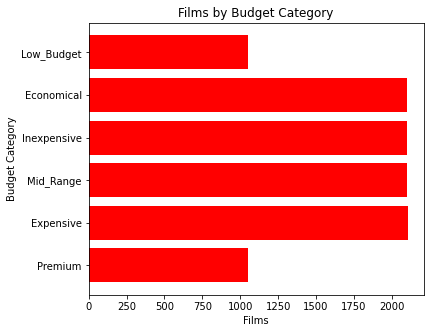

In [70]:
# below will display the split of films within the categories
fig, ax = plt.subplots()
ax.barh(categories['budget_category'],categories['count'], color = 'r')
ax.set_xlabel("Films")
ax.set_ylabel("Budget Category")
ax.set_title('Films by Budget Category')
fig.set_size_inches([6, 5])
fig.savefig("films_by_cat1.jpg")
plt.show()

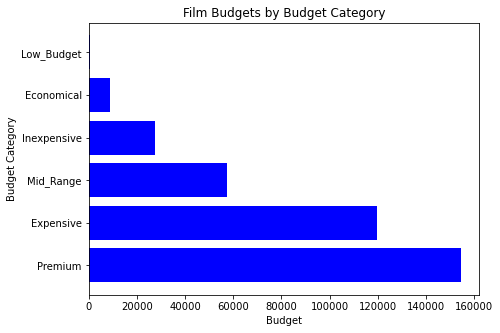

In [71]:
# while the below displays the split of film budgets within the categories
fig, ax = plt.subplots()
ax.barh(categories['budget_category'],categories['sum'], color = 'b')
ax.set_xlabel("Budget")
ax.set_ylabel("Budget Category")
ax.set_title('Film Budgets by Budget Category')
fig.set_size_inches([7, 5])
fig.savefig("budget_by_cat1.jpg")
plt.show()

Unsurprisingly, the Premium category has the highest value of films despite having the joint lowest number of films within the categories.

I will now create a new column which will be used to join the production and grossing files together but to do this I will need to add a new column with release_year as a string and then join that to the film_title as the lookup_column

In [72]:
production_file['lookup_year'] = production_file['release_year'].astype(str)

In [73]:
production_file['lookup_column'] = production_file["film_title"] + '-' + production_file['lookup_year']

In [74]:
production_file.head()

,release_year,release_date,film_title,film_budget_$m,adjusted_film_budget_$m,budget_category,lookup_year,lookup_column
0,2019.0,NaT,AVENGERS: ENDGAME,356.0,377.86,Premium,2019.0,AVENGERS: ENDGAME-2019.0
1,2019.0,NaT,THE LION KING,260.0,275.96,Premium,2019.0,THE LION KING-2019.0
2,2019.0,NaT,FROZEN II,150.0,159.21,Premium,2019.0,FROZEN II-2019.0
3,2019.0,NaT,SPIDER-MAN: FAR FROM HOME,160.0,169.82,Premium,2019.0,SPIDER-MAN: FAR FROM HOME-2019.0
4,2019.0,NaT,CAPTAIN MARVEL,175.0,185.75,Premium,2019.0,CAPTAIN MARVEL-2019.0


## 4. Gross Files

I will now repeat the above steps to create the dataset for the film_gross titles.

In [75]:
#Create new DFs with only the columns required
columns_to_subset5 = ['release_year', 'film_title', 'film_gross']

top_movies_data_GS = top_movies_data[columns_to_subset5]
blockbuster_GS = blockbuster[columns_to_subset5]
movie_industry_dataset_GS = movie_industry_dataset[columns_to_subset5]
all_time_worldwide_bo_GS = all_time_worldwide_bo[columns_to_subset5]
tmds_movies_metadata_GS = tmds_movies_metadata[columns_to_subset5]
top_grossing_film_GS = top_grossing_film[columns_to_subset5]
tmdb_movie_GS = tmdb_movie[columns_to_subset5]

In [76]:
gross_file_names = pd.DataFrame({'file': ['blockbuster_GS','movie_industry_dataset_GS','tmdb_movie_GS','tmds_movies_metadata_GS','top_movies_data_GS','all_time_worldwide_bo_GS',
                                    'top_grossing_film_GS','all_time_worldwide_bo_GS']})

In [77]:
for index, row in gross_file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.info())')

blockbuster_GS
<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 429
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_year  430 non-null    int64 
 1   film_title    430 non-null    object
 2   film_gross    430 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.4+ KB
None
movie_industry_dataset_GS
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5456 entries, 0 to 7631
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  5456 non-null   int64  
 1   film_title    5456 non-null   object 
 2   film_gross    5397 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 170.5+ KB
None
tmdb_movie_GS
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 4798
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -

In [78]:
for index, row in gross_file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.head(2))')

blockbuster_GS
   release_year         film_title  film_gross
0          2019  AVENGERS: ENDGAME  2797800564
1          2019      THE LION KING  1656943394
movie_industry_dataset_GS
   release_year       film_title  film_gross
0          1980      THE SHINING  46998772.0
1          1980  THE BLUE LAGOON  58853106.0
tmdb_movie_GS
   release_year                                film_title  film_gross
0        2009.0                                    AVATAR  2787965087
1        2007.0  PIRATES OF THE CARIBBEAN: AT WORLD'S END   961000000
tmds_movies_metadata_GS
   release_year film_title   film_gross
0        1995.0  TOY STORY  373554033.0
1        1995.0    JUMANJI  262797249.0
top_movies_data_GS
   release_year film_title  film_gross
0        2009.0          9    48559999
1        2008.0         21   159846429
all_time_worldwide_bo_GS
   release_year         film_title  film_gross
0          2009             AVATAR  2845899541
1          2019  AVENGERS: ENDGAME  2797800564
top_grossing_

In [79]:
# I will join the subsetted dataframes to create the single gross file

gross_file = pd.concat([top_movies_data_GS,blockbuster_GS,movie_industry_dataset_GS,all_time_worldwide_bo_GS,
                                    tmds_movies_metadata_GS,top_grossing_film_GS,tmdb_movie_GS],ignore_index=True)

In [80]:
gross_file[gross_file["film_title"].str.contains('GONE WITH')].sort_values("film_gross", ascending=False)

,release_year,film_title,film_gross
19281,1939.0,GONE WITH THE WIND,402352579.0
10718,1939.0,GONE WITH THE WIND,400176459.0
23217,1939.0,GONE WITH THE WIND,400176459.0
10061,1939.0,GONE WITH THE WIND,390525192.0


In [81]:
gross_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23732 entries, 0 to 23731
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  23732 non-null  float64
 1   film_title    23732 non-null  object 
 2   film_gross    23673 non-null  float64
dtypes: float64(2), object(1)
memory usage: 556.3+ KB


In [82]:
# The combined file numbers are now showing as:

gross_file.info()
gross_file.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23732 entries, 0 to 23731
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  23732 non-null  float64
 1   film_title    23732 non-null  object 
 2   film_gross    23673 non-null  float64
dtypes: float64(2), object(1)
memory usage: 556.3+ KB


,release_year,film_gross
count,23732.000000,2.367300e+04
mean,2002.023934,1.202167e+08
std,13.675573,2.159241e+08
min,1914.000000,0.000000e+00
25%,1996.000000,3.109904e+06
50%,2005.000000,3.378816e+07
75%,2012.000000,1.407680e+08
max,2022.000000,2.847246e+09


In [83]:
gross_file.sort_values("film_gross", ascending=False).head(5)

,release_year,film_title,film_gross
8062,2009.0,AVATAR,2.847246e+09
285,2009.0,AVATAR,2.845900e+09
9758,2009.0,AVATAR,2.845900e+09
287,2019.0,AVENGERS: ENDGAME,2.797801e+09
9759,2019.0,AVENGERS: ENDGAME,2.797801e+09


In [84]:
gross_file[gross_file["film_title"].str.contains('GONE WITH')].sort_values("film_gross", ascending=False)

,release_year,film_title,film_gross
19281,1939.0,GONE WITH THE WIND,402352579.0
10718,1939.0,GONE WITH THE WIND,400176459.0
23217,1939.0,GONE WITH THE WIND,400176459.0
10061,1939.0,GONE WITH THE WIND,390525192.0


The above shows there are duplicates within the combined file which means I will need to drop duplicates and also drop NAs from the film_gross column.

In [85]:
gross_file.dropna(subset=['film_gross'], inplace =True)

In [86]:
gross_file.drop_duplicates(subset=['film_title','release_year'], inplace =True)

In [87]:
# I will now add a new column which makes the film_gross easier to read by displaying it in millions:

gross_file['film_gross_$m'] = round(gross_file['film_gross']/1000000,9)

In [88]:
gross_file.sort_values("film_gross", ascending=False).head(5)

,release_year,film_title,film_gross,film_gross_$m
285,2009.0,AVATAR,2.845900e+09,2845.899541
287,2019.0,AVENGERS: ENDGAME,2.797801e+09,2797.800564
3545,1997.0,TITANIC,2.207987e+09,2207.986545
3912,2015.0,STAR WARS: EPISODE VII - THE FORCE AWAKENS,2.068224e+09,2068.223624
288,2018.0,AVENGERS: INFINITY WAR,2.044541e+09,2044.540523


In [89]:
gross_file[gross_file["film_title"].str.contains('EVEREST')].sort_values("film_gross", ascending=False)

,release_year,film_title,film_gross,film_gross_$m
939,2015.0,EVEREST,221297061.0,221.297061


In [90]:
gross_file['cpi_year'] = round(gross_file['release_year']/1)

In [91]:
gross_file = gross_file.merge(cpi_data, how = 'left')

In [92]:
gross_file.head()

,release_year,film_title,film_gross,film_gross_$m,cpi_year,Year,Annual Average,Annual Percent Change (rate of inflation),current_cpi_diff
0,2009.0,9,48559999.0,48.559999,2009.0,2009.0,214.5,-0.4%,0.265268
1,2008.0,21,159846429.0,159.846429,2008.0,2008.0,215.3,3.8%,0.260567
2,2013.0,42,97470701.0,97.470701,2013.0,2013.0,233.0,1.5%,0.164807
3,1998.0,54,16757163.0,16.757163,1998.0,1998.0,163.0,1.6%,0.665031
4,2007.0,300,454161935.0,454.161935,2007.0,2007.0,207.3,2.9%,0.309214


In [93]:
gross_file['adjusted_film_gross_$m'] = round(gross_file['film_gross_$m']*(1+gross_file['current_cpi_diff']),2)

In [94]:
gross_file[gross_file["film_title"].str.contains('DEJ')].sort_values("film_gross", ascending=False)

,release_year,film_title,film_gross,film_gross_$m,cpi_year,Year,Annual Average,Annual Percent Change (rate of inflation),current_cpi_diff,adjusted_film_gross_$m
5760,2006.0,DEJA VU,180557550.0,180.55755,2006.0,2006.0,201.6,3.2%,0.34623,243.07


In [95]:
gross_file.sort_values("adjusted_film_gross_$m", ascending=False).tail(20)

,release_year,film_title,film_gross,film_gross_$m,cpi_year,Year,Annual Average,Annual Percent Change (rate of inflation),current_cpi_diff,adjusted_film_gross_$m
8815,2002.0,SHOTTAS,0.0,0.0,2002.0,2002.0,179.9,1.6%,0.508616,0.0
8816,1966.0,DALEKS' INVASION EARTH: 2150 A.D.,0.0,0.0,1966.0,1966.0,32.5,3.0%,7.350769,0.0
8817,2012.0,ILL MANORS,0.0,0.0,2012.0,2012.0,229.6,2.1%,0.182056,0.0
7091,1933.0,LITTLE WOMEN,0.0,0.0,1933.0,1933.0,12.9,-5.2%,20.038760,0.0
8819,2010.0,DRONES,0.0,0.0,2010.0,2010.0,218.1,1.6%,0.244383,0.0
8820,2011.0,CATCH.44,0.0,0.0,2011.0,2011.0,224.9,3.2%,0.206759,0.0
8821,2012.0,THE LETTER,0.0,0.0,2012.0,2012.0,229.6,2.1%,0.182056,0.0
8822,2012.0,GREYSTONE PARK,0.0,0.0,2012.0,2012.0,229.6,2.1%,0.182056,0.0
8823,2012.0,GIRL IN PROGRESS,0.0,0.0,2012.0,2012.0,229.6,2.1%,0.182056,0.0
8824,2012.0,ASTÃ©RIX AND OBÃ©LIX: GOD SAVE BRITANNIA,0.0,0.0,2012.0,2012.0,229.6,2.1%,0.182056,0.0


In [96]:
columns_to_subset6 = ['release_year', 'film_title', 'film_gross_$m', 'adjusted_film_gross_$m']
gross_file = gross_file[columns_to_subset6]

In [97]:
#I will remove any films which grossed less than $10k
gross_file = gross_file[gross_file['adjusted_film_gross_$m'] > 0.01]

In [98]:
gross_file[gross_file["film_title"].str.contains('CLERKS')].sort_values("adjusted_film_gross_$m", ascending=False)

,release_year,film_title,film_gross_$m,adjusted_film_gross_$m
5774,2006.0,CLERKS II,26.986174,36.33
5067,1994.0,CLERKS,3.151130,5.77


In [99]:
gross_file.sort_values("adjusted_film_gross_$m", ascending=False).head(20)

,release_year,film_title,film_gross_$m,adjusted_film_gross_$m
6483,1939.0,GONE WITH THE WIND,390.525192,7625.07
6606,1951.0,ALICE IN WONDERLAND,572.000000,5970.80
6506,1942.0,BAMBI,268.000000,4462.28
3545,1997.0,TITANIC,2207.986545,3733.63
285,2009.0,AVATAR,2845.899541,3600.83
6537,1937.0,SNOW WHITE AND THE SEVEN DWARFS,184.925486,3485.33
10969,1977.0,STAR WARS,775.398007,3472.66
287,2019.0,AVENGERS: ENDGAME,2797.800564,2969.59
6508,1950.0,CINDERELLA,263.591415,2968.41
2951,1973.0,THE EXORCIST,428.214478,2617.51


In [100]:
gross_file['lookup_year'] = gross_file['release_year'].astype(str)

In [101]:
gross_file['lookup_column'] = gross_file["film_title"] + '-' + gross_file['lookup_year']

In [102]:
gross_file.sort_values("adjusted_film_gross_$m", ascending=False).head(5)

,release_year,film_title,film_gross_$m,adjusted_film_gross_$m,lookup_year,lookup_column
6483,1939.0,GONE WITH THE WIND,390.525192,7625.07,1939.0,GONE WITH THE WIND-1939.0
6606,1951.0,ALICE IN WONDERLAND,572.000000,5970.80,1951.0,ALICE IN WONDERLAND-1951.0
6506,1942.0,BAMBI,268.000000,4462.28,1942.0,BAMBI-1942.0
3545,1997.0,TITANIC,2207.986545,3733.63,1997.0,TITANIC-1997.0
285,2009.0,AVATAR,2845.899541,3600.83,2009.0,AVATAR-2009.0


## 5. Combined Financial File

In [103]:
# merging the production file and gross files to create the financial data file

film_financial_data = production_file.merge(gross_file, how = 'left')

In [104]:
film_financial_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10507 entries, 0 to 10506
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   release_year             10507 non-null  float64       
 1   release_date             5009 non-null   datetime64[ns]
 2   film_title               10507 non-null  object        
 3   film_budget_$m           10507 non-null  float64       
 4   adjusted_film_budget_$m  10507 non-null  float64       
 5   budget_category          10507 non-null  object        
 6   lookup_year              10507 non-null  object        
 7   lookup_column            10507 non-null  object        
 8   film_gross_$m            7716 non-null   float64       
 9   adjusted_film_gross_$m   7716 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 902.9+ KB


In [105]:
## removing any rows where the adjusted_film_gross is null

film_financial_data.dropna(subset=['adjusted_film_gross_$m'], inplace =True)

In [106]:
film_financial_data[film_financial_data["film_title"].str.contains('SAN AN')].sort_values("adjusted_film_gross_$m", ascending=False)

,release_year,release_date,film_title,film_budget_$m,adjusted_film_budget_$m,budget_category,lookup_year,lookup_column,film_gross_$m,adjusted_film_gross_$m
4864,2015.0,NaT,SAN ANDREAS,110.0,125.97,Premium,2015.0,SAN ANDREAS-2015.0,456.258539,522.48


In [107]:
film_financial_data['film_net_amount_$m'] = film_financial_data['adjusted_film_gross_$m'] - film_financial_data['adjusted_film_budget_$m']

In [108]:
film_financial_data[film_financial_data["film_title"].str.contains('JAWS')].sort_values("adjusted_film_gross_$m", ascending=False)

,release_year,release_date,film_title,film_budget_$m,adjusted_film_budget_$m,budget_category,lookup_year,lookup_column,film_gross_$m,adjusted_film_gross_$m,film_net_amount_$m
5800,1975.0,1975-06-18,JAWS,7.0,35.31,Mid_Range,1975.0,JAWS-1975.0,470.700000,2374.50,2339.19
412,1978.0,NaT,JAWS 2,20.0,83.25,Expensive,1978.0,JAWS 2-1978.0,208.900376,869.56,786.31
364,1983.0,NaT,JAWS 3-D,20.5,55.86,Expensive,1983.0,JAWS 3-D-1983.0,87.987055,239.76,183.90
950,1987.0,NaT,JAWS: THE REVENGE,23.0,54.95,Expensive,1987.0,JAWS: THE REVENGE-1987.0,51.881013,123.95,69.00
10142,1987.0,1987-07-17,JAWS 4: THE REVENGE,23.0,54.95,Expensive,1987.0,JAWS 4: THE REVENGE-1987.0,15.728335,37.58,-17.37


In [109]:
film_financial_data['gross_multiple_of_budget'] = (round(film_financial_data['adjusted_film_gross_$m'],2) / round(film_financial_data['adjusted_film_budget_$m'],2))

In [110]:
film_financial_data['%_vs_budget'] = ((film_financial_data['adjusted_film_gross_$m'] - film_financial_data['adjusted_film_budget_$m']) / film_financial_data['adjusted_film_budget_$m'])*100

In [111]:
film_financial_data[film_financial_data["film_title"].str.contains('2012')].sort_values("adjusted_film_gross_$m", ascending=False)

,release_year,release_date,film_title,film_budget_$m,adjusted_film_budget_$m,budget_category,lookup_year,lookup_column,film_gross_$m,adjusted_film_gross_$m,film_net_amount_$m,gross_multiple_of_budget,%_vs_budget
104,2009.0,NaT,2012,200.0,253.05,Premium,2009.0,2012-2009.0,757.677748,958.67,705.62,3.788461,278.846078


In [112]:
film_financial_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7716 entries, 0 to 10506
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   release_year              7716 non-null   float64       
 1   release_date              2271 non-null   datetime64[ns]
 2   film_title                7716 non-null   object        
 3   film_budget_$m            7716 non-null   float64       
 4   adjusted_film_budget_$m   7716 non-null   float64       
 5   budget_category           7716 non-null   object        
 6   lookup_year               7716 non-null   object        
 7   lookup_column             7716 non-null   object        
 8   film_gross_$m             7716 non-null   float64       
 9   adjusted_film_gross_$m    7716 non-null   float64       
 10  film_net_amount_$m        7716 non-null   float64       
 11  gross_multiple_of_budget  7716 non-null   float64       
 12  %_vs_budget        

Taking my first steps into analysing the financial data I've now pulled together, I can use visualisation via a scatterplot chart to display where the film titles fall when we plot them by by adjusted gross and budget. 

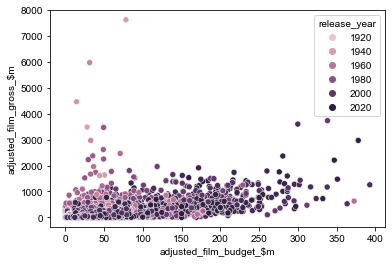

In [113]:
overall_financial_scatterplot = sns.scatterplot(x='adjusted_film_budget_$m',y='adjusted_film_gross_$m', data=film_financial_data, hue='release_year')
sns.set(rc={'figure.figsize':(15,5)})
sns.set_context("paper", font_scale=0.5)   
fig2 = overall_financial_scatterplot.get_figure()
fig2.savefig("overall_scatter_budget_gross.jpg")

Looking at the outliers above, the movies which made most money do not tend to have cost the most, the movies which break the 4bn all appear to have cost less than 100m. 

In [114]:
film_financial_data.corr().loc['adjusted_film_budget_$m','adjusted_film_gross_$m']

0.5408171408372147

The correlation coeffienct number of 0.54 indicates a moderate correlation between budget and gross amounts.

To dig someway deeper into the data, I will filter the file to only display movies within the Premium budget category and see if they are more or less correlated than the overall population.

In [115]:
premiumfilm_financial_data = film_financial_data[film_financial_data['budget_category'] == 'Premium']

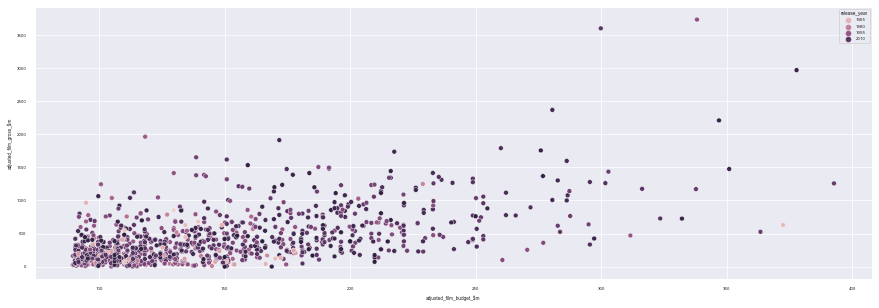

In [116]:
premium_financial_scatterplot = sns.scatterplot(x='adjusted_film_budget_$m',y='adjusted_film_gross_$m', data=premiumfilm_financial_data, hue='release_year')
sns.set(rc={'figure.figsize':(15,5)})
sns.set_context("paper", font_scale=0.5)  
fig3 = premium_financial_scatterplot.get_figure()
fig3.savefig("premium_scatter_budget_gross.jpg")

In [117]:
premiumfilm_financial_data.corr().loc['adjusted_film_budget_$m','adjusted_film_gross_$m']

0.5683050172616413

There is a 5% increase in correlation when I only include the Premium films suggesting that spending more does impact the financial performance of a film. 

In [118]:
low_film_financial_data = film_financial_data[film_financial_data['budget_category'] == 'Low_Budget']

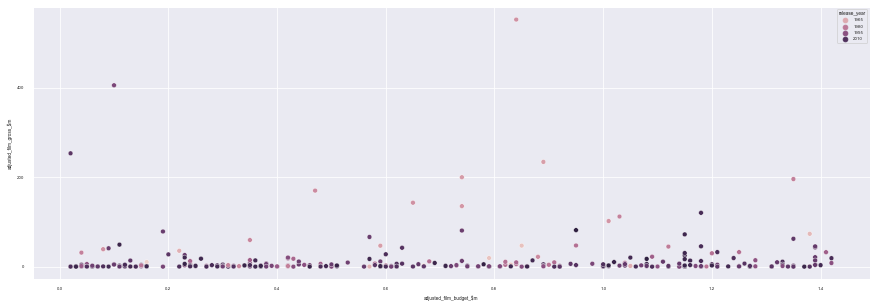

In [119]:
low_budget_financial_scatterplot = sns.scatterplot(x='adjusted_film_budget_$m',y='adjusted_film_gross_$m', data=low_film_financial_data, hue='release_year')
sns.set(rc={'figure.figsize':(15,5)})
sns.set_context("paper", font_scale=3.5)
fig4 = low_budget_financial_scatterplot.get_figure()
fig4.savefig("low_budget_scatter_budget_gross.jpg")

In [120]:
low_film_financial_data.corr().loc['adjusted_film_budget_$m','adjusted_film_gross_$m']

0.02989382586990369

However, when I remove all films except for the low_budget productions, the correlation drops by more than 94% from the overall number further suggesting that spending more on a film results in earning more. 

In [121]:
financial_categories = film_financial_data.groupby('budget_category')['film_net_amount_$m'].agg(['sum','mean','median']).reset_index()

In [122]:
financial_categories.sort_values('sum', ascending=False)

,budget_category,sum,mean,median
5,Premium,277480.43,270.185424,167.690
1,Expensive,204055.85,101.773491,34.950
4,Mid_Range,109256.14,58.363323,14.625
2,Inexpensive,56207.32,36.192737,6.670
0,Economical,22241.43,23.535905,4.550
3,Low_Budget,4808.65,15.314172,1.460


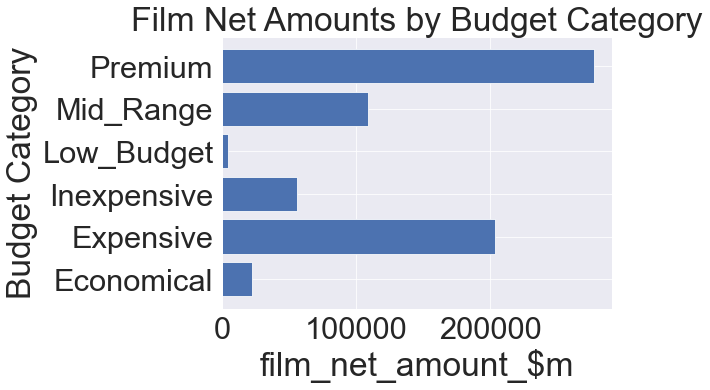

In [123]:
# while the below displays the split of film budgets within the categories
fig, ax = plt.subplots()
ax.barh(financial_categories['budget_category'],financial_categories['sum'], color = 'b')
ax.set_xlabel("film_net_amount_$m")
ax.set_ylabel("Budget Category")
ax.set_title('Film Net Amounts by Budget Category')
fig.set_size_inches([7, 5])
fig.savefig("net_amounts_by_cat1.jpg")
plt.show()

In [124]:
films_by_year = film_financial_data.groupby('release_year')['film_net_amount_$m'].agg(['sum','count','mean','median']).reset_index()

In [125]:
films_by_year.rename(columns={'sum': 'Net Amount','count': 'Films', 'mean':'Annual Average'}, inplace=True)

In [126]:
films_by_year

,release_year,Net Amount,Films,Annual Average,median
0,1915.0,292.89,1,292.890000,292.89
1,1916.0,393.62,2,196.810000,196.81
2,1918.0,140.23,1,140.230000,140.23
3,1921.0,34.12,1,34.120000,34.12
4,1922.0,-11.30,1,-11.300000,-11.30
...,...,...,...,...,...
98,2017.0,24554.05,169,145.290237,39.94
99,2018.0,22801.44,167,136.535569,36.73
100,2019.0,23473.81,151,155.455695,43.96
101,2020.0,1651.49,37,44.634865,-2.51


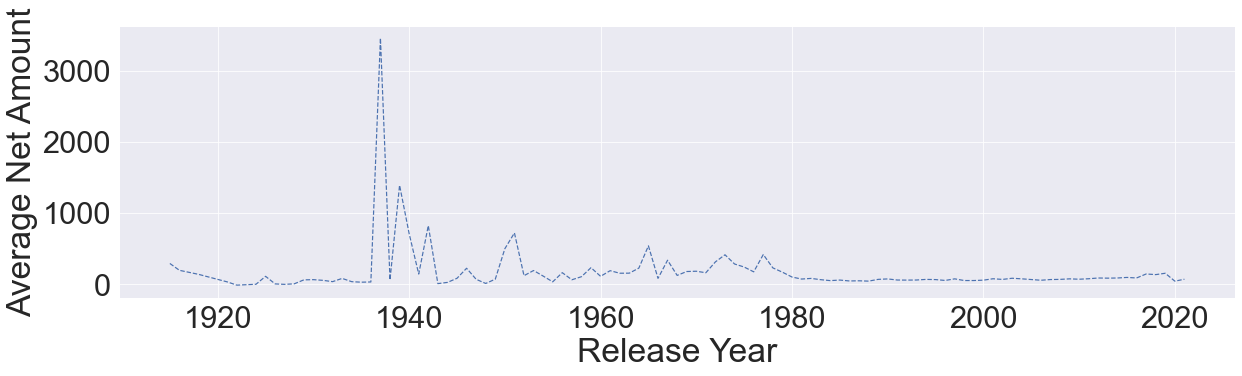

In [127]:
fig, ax = plt.subplots(figsize=(20,5))
plt.rcParams.update({'font.size': 5})
ax.plot(films_by_year['release_year'], films_by_year['Annual Average'], linestyle = '--')
ax.set_xlabel("Release Year")
ax.set_ylabel("Average Net Amount")
fig.savefig("avg_net_amounts_by_year.jpg")
plt.show()

Looking at the timeline above, it appears that the average net amount for films pre 1980 is more volatile which suggests it should be more scattered and less correlated. I will carry out the check on this:

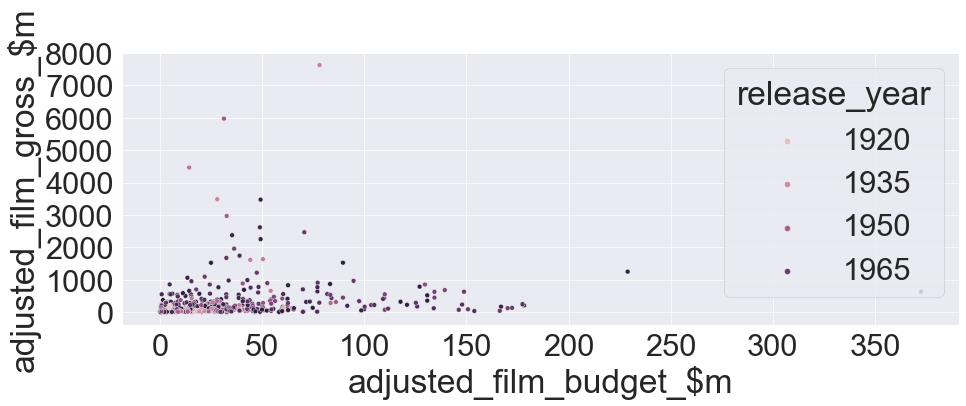

In [128]:
pre_80s_films = film_financial_data[film_financial_data['release_year'] < 1980]
pre_80s_films_scatterplot = sns.scatterplot(x='adjusted_film_budget_$m',y='adjusted_film_gross_$m', data=pre_80s_films, hue='release_year')
sns.set(rc={'figure.figsize':(15,5)})
sns.set_context("paper", font_scale=0.5)
fig5 = pre_80s_films_scatterplot.get_figure()
fig5.savefig("pre80s_scatter_budget_gross.jpg")

In [129]:
pre_80s_films.corr().loc['adjusted_film_budget_$m','adjusted_film_gross_$m']

0.16161214634210413

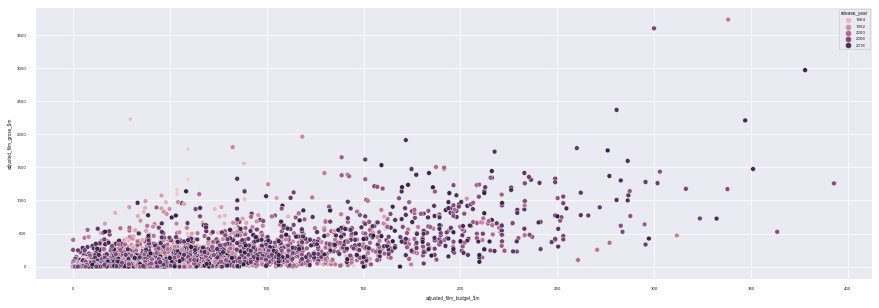

In [130]:
post_1980s_films = film_financial_data[film_financial_data['release_year'] >= 1980]
post_1980s_films_scatterplot = sns.scatterplot(x='adjusted_film_budget_$m',y='adjusted_film_gross_$m', data=post_1980s_films, hue='release_year')
sns.set(rc={'figure.figsize':(15,5)})
sns.set_context("paper", font_scale=0.5)
fig6 = post_1980s_films_scatterplot.get_figure()
fig6.savefig("post_1980s_films_scatter_budget_gross.jpg")

In [131]:
post_1980s_films.corr().loc['adjusted_film_budget_$m','adjusted_film_gross_$m']

0.6786410456704759

While there are clearly more films in the post 1980s population, the difference in correlation between the population is stark. The post 1980 movies are over 4 times more positively correlated which suggests that the money spent on movies post 1980 had a greater impact on how much was made. 

My take on this is that the film industry became more lucrative and bigger studios began pumping cash into productions and saw great returns as result. In my opinion, it's not a coincedence that films like Back to the Future, Jurassic Park and Independence Day took what Jaws and Star Wars did in the 70s and made the summer blockbuster an event again, something that grew further in the late 90s but appeared to be on the decline until the Marvel-isation of cinema consumed all available cash from cinema going patreons.

In [132]:
production_cost_by_year = film_financial_data.groupby('release_year')['adjusted_film_budget_$m'].agg(['sum','count','mean','median']).reset_index()

In [133]:
production_cost_by_year

,release_year,sum,count,mean,median
0,1915.0,2.69,1,2.690000,2.690
1,1916.0,14.59,2,7.295000,7.295
2,1918.0,4.52,1,4.520000,4.520
3,1921.0,3.79,1,3.790000,3.790
4,1922.0,17.77,1,17.770000,17.770
...,...,...,...,...,...
98,2017.0,9316.92,169,55.129704,27.680
99,2018.0,8286.81,167,49.621617,31.340
100,2019.0,8623.34,151,57.108212,27.600
101,2020.0,2321.85,37,62.752703,35.660


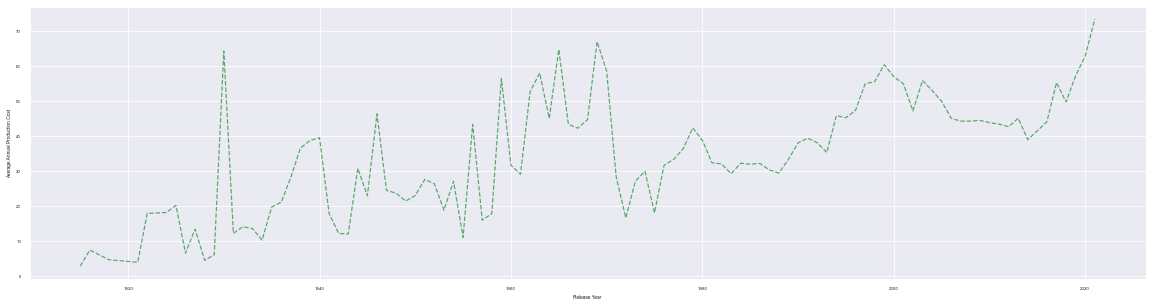

In [134]:
fig, ax = plt.subplots(figsize=(20,5))
plt.rcParams.update({'font.size': 10})
ax.plot(production_cost_by_year['release_year'], production_cost_by_year['mean'], linestyle = '--', color = 'g')
ax.set_xlabel("Release Year")
ax.set_ylabel("Average Annual Production Cost")
fig.savefig("avg_production_cost_by_year.jpg")
plt.show()

The above chart shows the average annual production cost, adjusted for inflation, over the time period and it is quite volatile until 1980 when there is a steady incline in production costs until the peak in the year 2000 which saw a steady decline until the Marvel movies kicked in with Ironman in 2008

In [135]:
## Tidying the columns on the financial file

columns_to_subset7 = ['release_year', 'film_title',	'adjusted_film_budget_$m', 'budget_category', 
                      'adjusted_film_gross_$m', 'lookup_column', 'film_net_amount_$m', 'gross_multiple_of_budget', 
                      '%_vs_budget']

In [136]:
film_financial_data = film_financial_data[columns_to_subset7]

In [137]:
film_financial_data.sort_values("gross_multiple_of_budget", ascending=False).head(5)

,release_year,film_title,adjusted_film_budget_$m,budget_category,adjusted_film_gross_$m,lookup_column,film_net_amount_$m,gross_multiple_of_budget,%_vs_budget
3659,2007.0,PARANORMAL ACTIVITY,0.02,Low_Budget,253.14,PARANORMAL ACTIVITY-2007.0,253.12,12657.000000,1.265600e+06
2392,1999.0,THE BLAIR WITCH PROJECT,0.10,Low_Budget,405.05,THE BLAIR WITCH PROJECT-1999.0,404.95,4050.500000,4.049500e+05
6396,1977.0,ERASERHEAD,0.04,Low_Budget,31.35,ERASERHEAD-1977.0,31.31,783.750000,7.827500e+04
6771,1972.0,THE WAY OF THE DRAGON,0.84,Low_Budget,551.89,THE WAY OF THE DRAGON-1972.0,551.05,657.011905,6.560119e+04
6410,1972.0,PINK FLAMINGOS,0.08,Low_Budget,38.96,PINK FLAMINGOS-1972.0,38.88,487.000000,4.860000e+04


In [138]:
def func_two(row):
    if row['gross_multiple_of_budget'] >= 100:
        return 'Obscenely Profitable'
    elif row['gross_multiple_of_budget'] > 1:
        return 'Profitable'
    elif row['gross_multiple_of_budget'] == 1:
        return 'Breakeven'
    else:
        return 'Loss Making'

In [139]:
film_financial_data['film_profitability'] = film_financial_data.apply(func_two, axis=1)

In [140]:
film_financial_data.tail(10)

,release_year,film_title,adjusted_film_budget_$m,budget_category,adjusted_film_gross_$m,lookup_column,film_net_amount_$m,gross_multiple_of_budget,%_vs_budget,film_profitability
10497,2003.0,X-MEN 2,184.37,Premium,599.36,X-MEN 2-2003.0,414.99,3.250854,225.085426,Profitable
10498,2013.0,YI DAI ZONG SHI,44.96,Expensive,67.54,YI DAI ZONG SHI-2013.0,22.58,1.502224,50.222420,Profitable
10499,2015.0,YI GE REN DE WU LIN,28.63,Mid_Range,0.15,YI GE REN DE WU LIN-2015.0,-28.48,0.005239,-99.476074,Loss Making
10500,2011.0,YOU GOT SERVED: BEAT THE WORLD,12.07,Inexpensive,1.48,YOU GOT SERVED: BEAT THE WORLD-2011.0,-10.59,0.122618,-87.738194,Loss Making
10501,2006.0,YOU ME AND DUPREE,72.70,Expensive,175.55,YOU ME AND DUPREE-2006.0,102.85,2.414718,141.471802,Profitable
10502,2005.0,YOURS MINE AND OURS,62.53,Expensive,100.56,YOURS MINE AND OURS-2005.0,38.03,1.608188,60.818807,Profitable
10503,2004.0,YU-GI-OH,28.73,Mid_Range,41.26,YU-GI-OH-2004.0,12.53,1.436129,43.612948,Profitable
10504,2015.0,ZHUO YAO JI,64.13,Expensive,411.45,ZHUO YAO JI-2015.0,347.32,6.415874,541.587401,Profitable
10505,2007.0,ZWARTBOEK,28.80,Mid_Range,35.66,ZWARTBOEK-2007.0,6.86,1.238194,23.819444,Profitable
10506,2008.0,長江七號 (CJ7),25.21,Mid_Range,59.63,長江七號 (CJ7)-2008.0,34.42,2.365331,136.533122,Profitable


In [141]:
financial_performance = (film_financial_data.groupby(['budget_category','film_profitability'], sort = False).size().unstack(fill_value = 0).reset_index()
                        .rename_axis(None, axis=0))

In [142]:
financial_performance

film_profitability,budget_category,Profitable,Obscenely Profitable,Loss Making,Breakeven
0,Premium,816,0,211,0
1,Expensive,1289,0,715,1
2,Mid_Range,1153,2,716,1
3,Economical,610,5,329,1
4,Inexpensive,931,1,621,0
5,Low_Budget,209,26,66,13


In [143]:
financial_performance['loss_making_%'] = round((financial_performance['Loss Making']/(financial_performance['Profitable']+financial_performance['Obscenely Profitable']+financial_performance['Loss Making']
                                          +financial_performance['Breakeven']))*100,2)
financial_performance['profitable_%'] = round(((financial_performance['Profitable']+financial_performance['Obscenely Profitable'])
                                         /(financial_performance['Profitable']+financial_performance['Obscenely Profitable']
                                           +financial_performance['Loss Making']
                                          +financial_performance['Breakeven']))*100,2)

In [144]:
financial_performance

film_profitability,budget_category,Profitable,Obscenely Profitable,Loss Making,Breakeven,loss_making_%,profitable_%
0,Premium,816,0,211,0,20.55,79.45
1,Expensive,1289,0,715,1,35.66,64.29
2,Mid_Range,1153,2,716,1,38.25,61.70
3,Economical,610,5,329,1,34.81,65.08
4,Inexpensive,931,1,621,0,39.99,60.01
5,Low_Budget,209,26,66,13,21.02,74.84


The table above shows that the risk of making a loss when making a movie increases (by almost double) when the budget increases above 1.43m and the risk of loss is stays between 34.81% and 40% until the budget exceeds 89.58m. 

This may explain the strategy used by Disney in selecting the likes of Chloé Zhao, Destin Daniel Cretton and Cate Shortland to direct their latest Marvel blockbusters as they previously had experience with smaller indie movies which performed well despite their budget. Disney then give them a budget well in excess of the Premium minimum and in all three cases, a profit was made despite the global pandemic. 

However, the film production world has changed, streaming services have become a huge challenger to cinema and in line with the pandemic have changed the consumption methods of newly released films. We only need to look at the (now settled) law suit brought by Scarlett Johansson against Disney when they released the movie Black Widow on their streaming service Disney+ while the movie was still in the cinemas, albeit at an additonal cost to the streaming subscription. The complaint here being that the release on the streaming service will lead to people not leaving their homes to travel to the cinema, meaning a potential reduction in box office takings of which Johannsson's bonus were tied to.

This to me signals a reduced reliance in box office numbers for movies, the releases of the future Avengers and Avatar sequels may still break records but future movie performance will most likely be measured in streams, or new subscriptions or in my next area of analysis, audience and critical receptions. 

## 6. Film Performance - Production Costs vs Audience Reviews

Using the data pulled from the IMDB .csv files and joining them with the production file produced above, I aim to carry out a similar analysis as I have done with the grossing amounts, with an aim of finding out if spending more money on a movie means the general audience will appreciate it more.

In [145]:
## I will begin by taking stock of the production file before cleansing the IMDB files and then joining them with the production file. 

production_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10507 entries, 0 to 10774
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   release_year             10507 non-null  float64       
 1   release_date             5009 non-null   datetime64[ns]
 2   film_title               10507 non-null  object        
 3   film_budget_$m           10507 non-null  float64       
 4   adjusted_film_budget_$m  10507 non-null  float64       
 5   budget_category          10507 non-null  object        
 6   lookup_year              10507 non-null  object        
 7   lookup_column            10507 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 1.0+ MB


In [146]:
imdb_movie_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4798 non-null   object 
 1   director_name              4813 non-null   object 
 2   num_critic_for_reviews     4773 non-null   float64
 3   duration                   4801 non-null   float64
 4   director_facebook_likes    4813 non-null   float64
 5   actor_3_facebook_likes     4795 non-null   float64
 6   actor_2_name               4803 non-null   object 
 7   actor_1_facebook_likes     4806 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4813 non-null   object 
 10  actor_1_name               4806 non-null   object 
 11  film_title                 4813 non-null   object 
 12  num_voted_users            4813 non-null   int64  
 13  cast_total_facebook_likes  4813 non-null   int64

In [147]:
imdb_top_1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Poster_Link   1000 non-null   object 
 1   film_title    1000 non-null   object 
 2   release_year  1000 non-null   int64  
 3   Certificate   899 non-null    object 
 4   Runtime       1000 non-null   object 
 5   Genre         1000 non-null   object 
 6   imdb_score    1000 non-null   float64
 7   Overview      1000 non-null   object 
 8   Meta_score    843 non-null    float64
 9   Director      1000 non-null   object 
 10  Star1         1000 non-null   object 
 11  Star2         1000 non-null   object 
 12  Star3         1000 non-null   object 
 13  Star4         1000 non-null   object 
 14  No_of_Votes   1000 non-null   int64  
 15  Gross         831 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 132.8+ KB


In [148]:
columns_to_subset8 = ['film_title','release_year','imdb_score']

In [149]:
imdb_movie_metadata_sub = imdb_movie_metadata[columns_to_subset8]

In [150]:
imdb_top_1000_sub = imdb_top_1000[columns_to_subset8]

In [151]:
imdb_file = pd.concat([imdb_movie_metadata_sub,imdb_top_1000_sub],ignore_index=False)

In [152]:
imdb_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5813 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   film_title    5813 non-null   object 
 1   release_year  5813 non-null   float64
 2   imdb_score    5813 non-null   float64
dtypes: float64(2), object(1)
memory usage: 181.7+ KB


In [153]:
imdb_file.drop_duplicates(subset=['film_title','release_year'], inplace =True)

In [154]:
imdb_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5385 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   film_title    5385 non-null   object 
 1   release_year  5385 non-null   float64
 2   imdb_score    5385 non-null   float64
dtypes: float64(2), object(1)
memory usage: 168.3+ KB


In [155]:
imdb_file.sort_values("release_year", ascending=False).head(5)

,film_title,release_year,imdb_score
20,SOORARAI POTTRU,2020.0,8.6
205,SOUL,2020.0,8.1
464,DIL BECHARA,2020.0,7.9
18,HAMILTON,2020.0,8.6
613,DRUK,2020.0,7.8


In [156]:
imdb_file['lookup_year'] = imdb_file['release_year'].astype(str)

In [157]:
imdb_file['lookup_column'] = imdb_file["film_title"] + '-' + imdb_file['lookup_year']

In [158]:
imdb_file.head()

,film_title,release_year,imdb_score,lookup_year,lookup_column
0,AVATAR,2009.0,7.9,2009.0,AVATAR-2009.0
1,PIRATES OF THE CARIBBEAN: AT WORLD'S END,2007.0,7.1,2007.0,PIRATES OF THE CARIBBEAN: AT WORLD'S END-2007.0
2,SPECTRE,2015.0,6.8,2015.0,SPECTRE-2015.0
3,THE DARK KNIGHT RISES,2012.0,8.5,2012.0,THE DARK KNIGHT RISES-2012.0
5,JOHN CARTER,2012.0,6.6,2012.0,JOHN CARTER-2012.0


In [159]:
production_file = production_file.merge(imdb_file, how = 'left')

In [160]:
production_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10507 entries, 0 to 10506
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   release_year             10507 non-null  float64       
 1   release_date             5009 non-null   datetime64[ns]
 2   film_title               10507 non-null  object        
 3   film_budget_$m           10507 non-null  float64       
 4   adjusted_film_budget_$m  10507 non-null  float64       
 5   budget_category          10507 non-null  object        
 6   lookup_year              10507 non-null  object        
 7   lookup_column            10507 non-null  object        
 8   imdb_score               4244 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 820.9+ KB


In [161]:
columns_to_subset9 = ['release_year','film_title','adjusted_film_budget_$m','imdb_score','budget_category']
production_imdb_file = production_file[columns_to_subset9]

In [162]:
production_imdb_file.dropna(subset=['imdb_score'], inplace =True)

<ipython-input-162-1b5613ba7544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production_imdb_file.dropna(subset=['imdb_score'], inplace =True)


In [163]:
production_imdb_file.head()

,release_year,film_title,adjusted_film_budget_$m,imdb_score,budget_category
0,2019.0,AVENGERS: ENDGAME,377.86,8.4,Premium
5,2019.0,TOY STORY 4,212.28,7.8,Premium
6,2019.0,JOKER,58.38,8.5,Expensive
10,2018.0,AVENGERS: INFINITY WAR,346.95,8.4,Premium
13,2018.0,INCREDIBLES 2,216.17,7.6,Premium


In [164]:
# calculating the amount each film cost in millions per IMDB score point in a new column. In this case, lower is better as it means it cost less for a movie to achieve a high IMDB score.

production_imdb_file['$m_per_imdb_point'] = round(production_imdb_file['adjusted_film_budget_$m']/production_imdb_file['imdb_score'],2)

<ipython-input-164-1b6e922e383d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production_imdb_file['$m_per_imdb_point'] = round(production_imdb_file['adjusted_film_budget_$m']/production_imdb_file['imdb_score'],2)


In [165]:
#The ten films with the highest (and worst) $m per IMDB point rating - Cleopatra and POTC:AWE have a good IMDB score but the production costs are so high they end up on this list

production_imdb_file.sort_values("$m_per_imdb_point", ascending=False).head(10)

,release_year,film_title,adjusted_film_budget_$m,imdb_score,budget_category,$m_per_imdb_point
2140,1997.0,SPEED 2: CRUISE CONTROL,270.55,3.7,Premium,73.12
138,2006.0,SUPERMAN RETURNS,363.48,6.1,Premium,59.59
2407,1999.0,WILD WILD WEST,276.94,4.8,Premium,57.70
2122,1997.0,BATMAN & ROBIN,211.37,3.7,Premium,57.13
120,2007.0,PIRATES OF THE CARIBBEAN: AT WORLD'S END,392.76,7.1,Premium,55.32
122,2007.0,SPIDER-MAN 3,337.78,6.2,Premium,54.48
10008,1963.0,CLEOPATRA,372.51,7.0,Premium,53.22
3355,2005.0,SON OF THE MASK,116.73,2.2,Premium,53.06
248,1995.0,WATERWORLD,311.65,6.1,Premium,51.09
524,1981.0,INCHON,137.34,2.7,Premium,50.87


In [166]:
#The ten films with the lowest (and best) $m per IMDB point rating. The most expensive movie on this list cost $100k, Aronofsky's PI while Kevin Smith's debut Clerks is the highest rated at 7.8

production_imdb_file.sort_values("$m_per_imdb_point", ascending=True).head(10)

,release_year,film_title,adjusted_film_budget_$m,imdb_score,budget_category,$m_per_imdb_point
3659,2007.0,PARANORMAL ACTIVITY,0.02,6.3,Low_Budget,0.00
2285,1998.0,PI,0.10,7.5,Low_Budget,0.01
6401,2010.0,TINY FURNITURE,0.08,6.3,Low_Budget,0.01
6396,1977.0,ERASERHEAD,0.04,7.4,Low_Budget,0.01
6345,2003.0,OSAMA,0.07,7.4,Low_Budget,0.01
2245,1997.0,IN THE COMPANY OF MEN,0.04,7.3,Low_Budget,0.01
6410,1972.0,PINK FLAMINGOS,0.08,6.1,Low_Budget,0.01
6403,2015.0,COUNTING,0.06,6.0,Low_Budget,0.01
6409,2013.0,DRY SPELL,0.03,3.3,Low_Budget,0.01
1741,1994.0,CLERKS,0.05,7.8,Low_Budget,0.01


In [167]:
## if I filter to display the top 10 Premium productions, I can see a marked increase in the IMDB scores (no movies below 7.7)

production_imdb_file[production_imdb_file['budget_category'] == 'Premium'].sort_values("$m_per_imdb_point", ascending=True).head(10)

,release_year,film_title,adjusted_film_budget_$m,imdb_score,budget_category,$m_per_imdb_point
1852,1995.0,CASINO,92.60,8.2,Premium,11.29
251,1994.0,FORREST GUMP,100.72,8.8,Premium,11.45
2842,2002.0,THE BOURNE IDENTITY,90.52,7.9,Premium,11.46
2387,1999.0,THE GREEN MILE,97.74,8.5,Premium,11.50
5252,2018.0,SPIDER-MAN: INTO THE SPIDER-VERSE,97.28,8.4,Premium,11.58
183,2001.0,SHREK,91.95,7.9,Premium,11.64
2383,1999.0,FIGHT CLUB,102.63,8.8,Premium,11.66
203,1999.0,THE MATRIX,102.63,8.7,Premium,11.80
5825,1965.0,DOCTOR ZHIVAGO,94.77,8.0,Premium,11.85
3604,2007.0,STARDUST,91.64,7.7,Premium,11.90


In [168]:
## Looking deeper into the other end of the scale and filtering to show to worst performing low budget movies, I now see the top IMDB score dropping to 6.1 with movies like Sharknado appearing on the list

production_imdb_file[production_imdb_file['budget_category'] == 'Low_Budget'].sort_values("$m_per_imdb_point", ascending=False).head(10)

,release_year,film_title,adjusted_film_budget_$m,imdb_score,budget_category,$m_per_imdb_point
6308,2012.0,SNOW WHITE: A DEADLY SUMMER,1.18,2.2,Low_Budget,0.54
6269,2012.0,CROWSNEST,1.42,3.8,Low_Budget,0.37
6092,2013.0,SHARKNADO,1.16,3.3,Low_Budget,0.35
9444,2006.0,IN HER LINE OF FIRE,1.35,4.1,Low_Budget,0.33
6310,2014.0,DOC HOLLIDAY'S REVENGE,1.15,3.8,Low_Budget,0.30
4521,2012.0,THE DEVIL INSIDE,1.18,4.2,Low_Budget,0.28
4511,2012.0,CHERNOBYL DIARIES,1.18,5.0,Low_Budget,0.24
6284,2005.0,CRY_WOLF,1.39,5.9,Low_Budget,0.24
6262,2013.0,HOME RUN,1.40,6.0,Low_Budget,0.23
6273,2010.0,BEYOND THE BLACK RAINBOW,1.37,6.1,Low_Budget,0.22


Using the same process as before, I will attempt to uncover any correlation between budget spend and IMDB score beginning with the below scatterplot

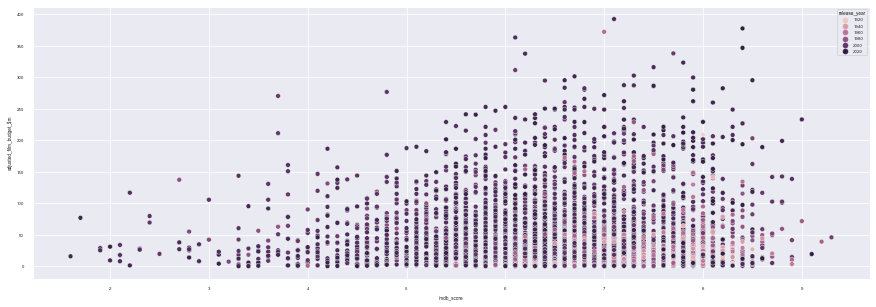

In [169]:
overall_imdb_performance_scatterplot = sns.scatterplot(x='imdb_score',y='adjusted_film_budget_$m', data=production_imdb_file, hue='release_year',)
sns.set(rc={'figure.figsize':(15,5)})
sns.set_context("paper", font_scale=0.5)
fig7 = overall_imdb_performance_scatterplot.get_figure()
fig7.savefig("overall_scatter_imdb_performance.jpg")

The chart shows a similar pattern as the gross comparison had, a lot of films bunched together with some outliers. However, it is notable that none of the films above 300m have an IMDB score of less than 6, only a small amount above 200m score less than 6 and only movies costing under 100m have scored less than 2 on IMDB.

In [170]:
## Cosner's Waterworld, Spiderman 3 and Superman Retuns are the films costing more than 300m that scored nearest to 6 as seen below:

production_imdb_file[(production_imdb_file['adjusted_film_budget_$m'] > 300) & (production_imdb_file['imdb_score'] < 6.5)].sort_values("$m_per_imdb_point", ascending=False).head(10)

,release_year,film_title,adjusted_film_budget_$m,imdb_score,budget_category,$m_per_imdb_point
138,2006.0,SUPERMAN RETURNS,363.48,6.1,Premium,59.59
122,2007.0,SPIDER-MAN 3,337.78,6.2,Premium,54.48
248,1995.0,WATERWORLD,311.65,6.1,Premium,51.09


In [171]:
## The below list shows the movies costing more than 200m that have scored less than 6 on IMDB.

production_imdb_file[(production_imdb_file['adjusted_film_budget_$m'] > 200) & (production_imdb_file['imdb_score'] < 6)].sort_values("$m_per_imdb_point", ascending=False).head(10)

,release_year,film_title,adjusted_film_budget_$m,imdb_score,budget_category,$m_per_imdb_point
2140,1997.0,SPEED 2: CRUISE CONTROL,270.55,3.7,Premium,73.12
2407,1999.0,WILD WILD WEST,276.94,4.8,Premium,57.70
2122,1997.0,BATMAN & ROBIN,211.37,3.7,Premium,57.13
104,2009.0,2012,253.05,5.8,Premium,43.63
4233,2011.0,GREEN LANTERN,241.35,5.6,Premium,43.10
3683,2007.0,EVAN ALMIGHTY,229.11,5.4,Premium,42.43
50,2014.0,TRANSFORMERS: AGE OF EXTINCTION,240.79,5.7,Premium,42.24
4403,2012.0,BATTLESHIP,247.05,5.9,Premium,41.87
3182,2004.0,ALEXANDER,222.69,5.5,Premium,40.49
3515,2006.0,POSEIDON,215.40,5.6,Premium,38.46


In [172]:
production_imdb_file.corr().loc['adjusted_film_budget_$m','imdb_score']

0.024499636698093605

Compared to the 0.54 correlation coeffienct score that the relationship between a film's budget and a film's gross, there is little correlation, negative or positive, between a film's budget and how it's received by audiences. 

I will run the same sequence but for both the premium and low production budgeted films:

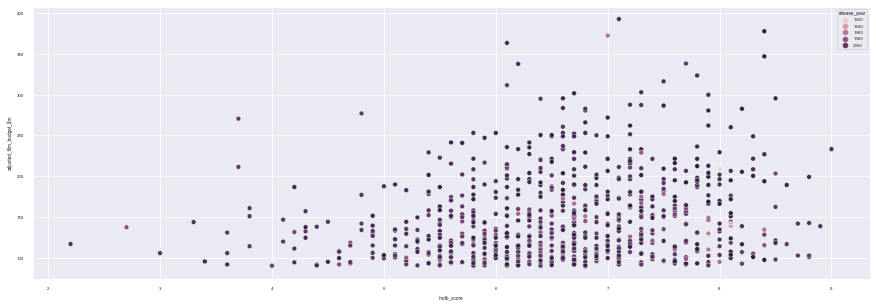

In [173]:
premium_budget_imdb_data = production_imdb_file[production_imdb_file['budget_category'] == 'Premium']

premium_budget_imdb_scatterplot = sns.scatterplot(x='imdb_score',y='adjusted_film_budget_$m', data=premium_budget_imdb_data, hue='release_year')
sns.set(rc={'figure.figsize':(15,5)})
sns.set_context("paper", font_scale=0.5)
fig8 = premium_budget_imdb_scatterplot.get_figure()
fig8.savefig("premium_budget_scatter_budget_gross.jpg")

In [174]:
premium_budget_imdb_data.corr().loc['adjusted_film_budget_$m','imdb_score']

0.20258380115041003

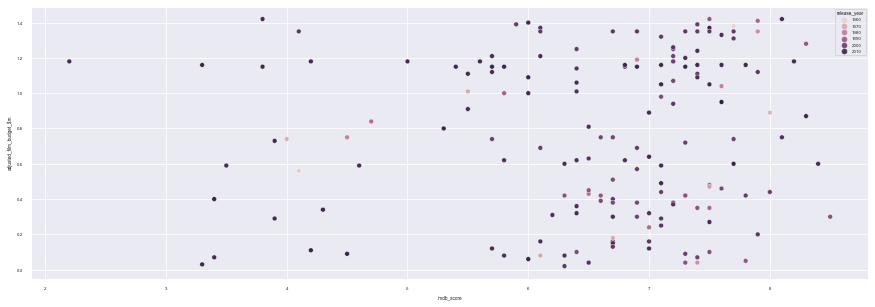

In [175]:
low_budget_imdb_data = production_imdb_file[production_imdb_file['budget_category'] == 'Low_Budget']

low_budget_financial_scatterplot = sns.scatterplot(x='imdb_score',y='adjusted_film_budget_$m', data=low_budget_imdb_data, hue='release_year')
sns.set(rc={'figure.figsize':(15,5)})
sns.set_context("paper", font_scale=0.5)
fig9 = low_budget_financial_scatterplot.get_figure()
fig9.savefig("low_budget_scatter_budget_gross.jpg")

In [176]:
low_budget_imdb_data.corr().loc['adjusted_film_budget_$m','imdb_score']

0.06814425099921533

While there is minimal correlation between production budgets and IMDB scores, it does tend to increase when we look only at the Premium budgeted films which may suggest that audiences might prefer the big budget films but there is no guarantee that they will.

In [177]:
imdb_score_by_year = production_imdb_file.groupby('release_year')['imdb_score'].agg(['sum','count','mean','median']).reset_index()

In [178]:
imdb_score_by_year

,release_year,sum,count,mean,median
0,1916.0,8.0,1,8.000000,8.00
1,1921.0,8.3,1,8.300000,8.30
2,1925.0,16.5,2,8.250000,8.25
3,1926.0,8.1,1,8.100000,8.10
4,1927.0,8.3,1,8.300000,8.30
...,...,...,...,...,...
91,2016.0,629.8,95,6.629474,6.80
92,2017.0,133.7,17,7.864706,7.80
93,2018.0,95.6,12,7.966667,7.85
94,2019.0,127.9,16,7.993750,7.90


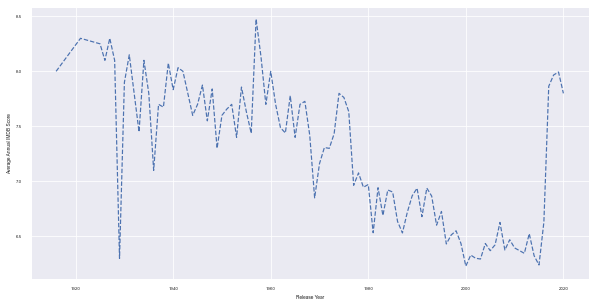

In [179]:
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams.update({'font.size': 5})
ax.plot(imdb_score_by_year['release_year'], imdb_score_by_year['mean'], linestyle = '--', color = 'b')
ax.set_xlabel("Release Year")
ax.set_ylabel("Average Annual IMDB Score")
fig.savefig("avg_imdb_score_by_year.jpg")
plt.show()

The interesting contrast between the above image and the one around average production costs is how the IMDB average score dipped at the same time as the production costs increased.

In [180]:
## I will add a new columns assigning each film title a categorisation based on their imdb score. Adored (>7.9), Above Average (>6.55), Below Average (>5.1) and Poorly Received (<5.1)

production_imdb_file.describe(percentiles= [.1, .9])

,release_year,adjusted_film_budget_$m,imdb_score,$m_per_imdb_point
count,4244.000000,4244.000000,4244.000000,4244.000000
mean,2001.093779,52.327069,6.547243,8.218556
std,14.140241,54.998298,1.104201,8.640078
min,1916.000000,0.020000,1.600000,0.000000
10%,1984.000000,5.030000,5.100000,0.750000
50%,2004.000000,33.820000,6.600000,5.250000
90%,2014.000000,126.530000,7.900000,20.434000
max,2020.000000,392.760000,9.300000,73.120000


In [181]:
def func3(row):
    if row['imdb_score'] >= 7.90:
        return 'Adored'
    elif row['imdb_score'] >= 6.55:
        return 'Above Average'
    elif row['imdb_score'] >= 5.1:
        return 'Below Average'
    else:
        return 'Poorly Received'

In [182]:
production_imdb_file['audience_reception'] = production_imdb_file.apply(func3, axis=1)

<ipython-input-182-42917a4619fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production_imdb_file['audience_reception'] = production_imdb_file.apply(func3, axis=1)


In [183]:
production_imdb_file.sort_values("adjusted_film_budget_$m", ascending=False).head(10)

,release_year,film_title,adjusted_film_budget_$m,imdb_score,budget_category,$m_per_imdb_point,audience_reception
120,2007.0,PIRATES OF THE CARIBBEAN: AT WORLD'S END,392.76,7.1,Premium,55.32,Above Average
0,2019.0,AVENGERS: ENDGAME,377.86,8.4,Premium,44.98,Adored
10008,1963.0,CLEOPATRA,372.51,7.0,Premium,53.22,Above Average
138,2006.0,SUPERMAN RETURNS,363.48,6.1,Premium,59.59,Below Average
10,2018.0,AVENGERS: INFINITY WAR,346.95,8.4,Premium,41.30,Adored
220,1997.0,TITANIC,338.19,7.7,Premium,43.92,Above Average
122,2007.0,SPIDER-MAN 3,337.78,6.2,Premium,54.48,Below Average
97,2010.0,TANGLED,323.54,7.8,Premium,41.48,Above Average
101,2009.0,HARRY POTTER AND THE HALF-BLOOD PRINCE,316.32,7.5,Premium,42.18,Above Average
248,1995.0,WATERWORLD,311.65,6.1,Premium,51.09,Below Average


In [184]:
## creating a table similar to the one I created for the financial data to see if specific budget categories perform better in the eyes of audiences

film_reception = (production_imdb_file.groupby(['budget_category','audience_reception'], sort = False).size().unstack(fill_value = 0).reset_index()
                        .rename_axis(None, axis=0))

In [185]:
film_reception

audience_reception,budget_category,Adored,Above Average,Below Average,Poorly Received
0,Premium,87,328,311,53
1,Expensive,103,472,515,97
2,Economical,68,191,145,41
3,Mid_Range,84,396,346,97
4,Inexpensive,92,349,242,63
5,Low_Budget,13,86,44,21


In [186]:
film_reception['below_average_%'] = round(((film_reception['Below Average']+film_reception['Poorly Received'])/(film_reception['Adored']
                                            +film_reception['Above Average']+film_reception['Below Average']
                                            +film_reception['Poorly Received']))*100,2)
film_reception['above_average_%'] = round(((film_reception['Above Average']+film_reception['Adored'])/(film_reception['Adored']
                                            +film_reception['Above Average']+film_reception['Below Average']
                                            +film_reception['Poorly Received']))*100,2)

In [187]:
film_reception

audience_reception,budget_category,Adored,Above Average,Below Average,Poorly Received,below_average_%,above_average_%
0,Premium,87,328,311,53,46.73,53.27
1,Expensive,103,472,515,97,51.56,48.44
2,Economical,68,191,145,41,41.80,58.20
3,Mid_Range,84,396,346,97,48.00,52.00
4,Inexpensive,92,349,242,63,40.88,59.12
5,Low_Budget,13,86,44,21,39.63,60.37


This time round the low budget films are the best performers in terms of having the highest percentage of above average films. Unlike the financial performance table, there is no real benefit to spending Premium amounts on films even if the reception gap for above average films between Expensive and Premium is nearly 5%

While spending more is no guarantee that audiences it doesn't stop studios from throwing money into the production of films, just look at Netflix giving Adam Sandler another 250m to produce four more exclusive movies for them (despite the quality of the previous four).

We may take it as a given that these future Sandler movies will not be critically well received, does spending more usually result in better critical reception? 

## 7. Film Performance - Production Costs vs Critic Reviews

This time I will use the data pulled from the Rotten Tomatoes .csv file joined with the production file and run through the same steps as the IMDB files in an attempt to discover what relationship, if any, there is with production cost and critical reception.

In [188]:
## I will begin by taking stock of the production file before cleansing the rotten tomato file and joining it with the production file. 

production_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10507 entries, 0 to 10506
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   release_year             10507 non-null  float64       
 1   release_date             5009 non-null   datetime64[ns]
 2   film_title               10507 non-null  object        
 3   film_budget_$m           10507 non-null  float64       
 4   adjusted_film_budget_$m  10507 non-null  float64       
 5   budget_category          10507 non-null  object        
 6   lookup_year              10507 non-null  object        
 7   lookup_column            10507 non-null  object        
 8   imdb_score               4244 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 820.9+ KB


In [189]:
rotten_tomatoes_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16544 entries, 0 to 17711
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   rotten_tomatoes_link              16544 non-null  object        
 1   film_title                        16544 non-null  object        
 2   movie_info                        16375 non-null  object        
 3   critics_consensus                 8884 non-null   object        
 4   content_rating                    16544 non-null  object        
 5   genres                            16537 non-null  object        
 6   directors                         16388 non-null  object        
 7   authors                           15222 non-null  object        
 8   actors                            16273 non-null  object        
 9   release_date                      16544 non-null  datetime64[ns]
 10  streaming_release_date            16303 non-nu

In [190]:
columns_to_subset10 = ['film_title','release_year','tomatometer_status', 'tomatometer_rating']

In [191]:
rotten_tomatoes_movie_sub = rotten_tomatoes_movie[columns_to_subset10]

In [192]:
rotten_tomatoes_movie_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16544 entries, 0 to 17711
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   film_title          16544 non-null  object 
 1   release_year        16544 non-null  float64
 2   tomatometer_status  16512 non-null  object 
 3   tomatometer_rating  16512 non-null  float64
dtypes: float64(2), object(2)
memory usage: 646.2+ KB


In [193]:
rotten_tomatoes_movie_sub.drop_duplicates(subset=['film_title','release_year'], inplace =True)

<ipython-input-193-e8b2b17b267d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_movie_sub.drop_duplicates(subset=['film_title','release_year'], inplace =True)


In [194]:
rotten_tomatoes_movie_sub.dropna(subset=['tomatometer_rating'], inplace =True)

<ipython-input-194-58ae56971d2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_movie_sub.dropna(subset=['tomatometer_rating'], inplace =True)


In [195]:
rotten_tomatoes_movie_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 0 to 17711
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   film_title          16512 non-null  object 
 1   release_year        16512 non-null  float64
 2   tomatometer_status  16512 non-null  object 
 3   tomatometer_rating  16512 non-null  float64
dtypes: float64(2), object(2)
memory usage: 645.0+ KB


In [196]:
rotten_tomatoes_movie_sub.sort_values("release_year", ascending=False).head(5)

,film_title,release_year,tomatometer_status,tomatometer_rating
4732,CODA,2020.0,Rotten,50.0
10989,NEVER TOO LATE,2020.0,Rotten,50.0
2403,AFTER WE LEAVE,2020.0,Fresh,83.0
17110,WE SUMMON THE DARKNESS,2020.0,Fresh,69.0
9736,LOST GIRLS,2020.0,Fresh,72.0


In [197]:
rotten_tomatoes_movie_sub['lookup_year'] = rotten_tomatoes_movie_sub['release_year'].astype(str)
rotten_tomatoes_movie_sub['lookup_column'] = rotten_tomatoes_movie_sub["film_title"] + '-' + rotten_tomatoes_movie_sub['lookup_year']

<ipython-input-197-4c0e2f8c1aee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_movie_sub['lookup_year'] = rotten_tomatoes_movie_sub['release_year'].astype(str)
<ipython-input-197-4c0e2f8c1aee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_movie_sub['lookup_column'] = rotten_tomatoes_movie_sub["film_title"] + '-' + rotten_tomatoes_movie_sub['lookup_year']


In [198]:
rotten_tomatoes_movie_sub.head()

,film_title,release_year,tomatometer_status,tomatometer_rating,lookup_year,lookup_column
0,PERCY JACKSON & THE OLYMPIANS: THE LIGHTNING T...,2010.0,Rotten,49.0,2010.0,PERCY JACKSON & THE OLYMPIANS: THE LIGHTNING T...
1,PLEASE GIVE,2010.0,Certified-Fresh,87.0,2010.0,PLEASE GIVE-2010.0
2,10,1979.0,Fresh,67.0,1979.0,10-1979.0
3,12 ANGRY MEN (TWELVE ANGRY MEN),1957.0,Certified-Fresh,100.0,1957.0,12 ANGRY MEN (TWELVE ANGRY MEN)-1957.0
4,"20,000 LEAGUES UNDER THE SEA",1954.0,Fresh,89.0,1954.0,"20,000 LEAGUES UNDER THE SEA-1954.0"


In [199]:
production_file = production_file.merge(rotten_tomatoes_movie_sub, how = 'left')

In [200]:
production_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10507 entries, 0 to 10506
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   release_year             10507 non-null  float64       
 1   release_date             5009 non-null   datetime64[ns]
 2   film_title               10507 non-null  object        
 3   film_budget_$m           10507 non-null  float64       
 4   adjusted_film_budget_$m  10507 non-null  float64       
 5   budget_category          10507 non-null  object        
 6   lookup_year              10507 non-null  object        
 7   lookup_column            10507 non-null  object        
 8   imdb_score               4244 non-null   float64       
 9   tomatometer_status       5898 non-null   object        
 10  tomatometer_rating       5898 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 985.0+ KB


In [201]:
columns_to_subset11 = ['release_year','film_title','adjusted_film_budget_$m','tomatometer_status','tomatometer_rating','budget_category']
production_rt_file = production_file[columns_to_subset11]

In [202]:
production_rt_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10507 entries, 0 to 10506
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   release_year             10507 non-null  float64
 1   film_title               10507 non-null  object 
 2   adjusted_film_budget_$m  10507 non-null  float64
 3   tomatometer_status       5898 non-null   object 
 4   tomatometer_rating       5898 non-null   float64
 5   budget_category          10507 non-null  object 
dtypes: float64(3), object(3)
memory usage: 574.6+ KB


In [203]:
production_rt_file.drop_duplicates(subset=['film_title','release_year'], inplace =True)
production_rt_file.dropna(subset=['tomatometer_rating'], inplace =True)

<ipython-input-203-0e722f7ca99d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production_rt_file.drop_duplicates(subset=['film_title','release_year'], inplace =True)
<ipython-input-203-0e722f7ca99d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production_rt_file.dropna(subset=['tomatometer_rating'], inplace =True)


In [204]:
production_rt_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5898 entries, 0 to 10493
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   release_year             5898 non-null   float64
 1   film_title               5898 non-null   object 
 2   adjusted_film_budget_$m  5898 non-null   float64
 3   tomatometer_status       5898 non-null   object 
 4   tomatometer_rating       5898 non-null   float64
 5   budget_category          5898 non-null   object 
dtypes: float64(3), object(3)
memory usage: 322.5+ KB


In [205]:
production_rt_file = production_rt_file[production_rt_file['tomatometer_rating'] > 0]

In [206]:
# calculating the amount each film cost in millions per Rotten Tomatoes percentage point in a new column. In this case, lower is better as it means it cost less for a movie to achieve a higher RT score.

production_rt_file['$m_per_rt_percent'] = round(production_rt_file['adjusted_film_budget_$m']/production_rt_file['tomatometer_rating'],2)

In [207]:
#The ten films with the highest (and worst) $m per RT percentage point - 50% of these movies fall into the Premium budget category.

production_rt_file.sort_values("$m_per_rt_percent", ascending=False).head(10)

,release_year,film_title,adjusted_film_budget_$m,tomatometer_status,tomatometer_rating,budget_category,$m_per_rt_percent
3205,2004.0,TWISTED,71.84,Rotten,1.0,Expensive,71.84
2979,2002.0,THE ADVENTURES OF PLUTO NASH,150.86,Rotten,4.0,Premium,37.72
4083,2010.0,THE LAST AIRBENDER,186.66,Rotten,5.0,Premium,37.33
2936,2002.0,ROLLERBALL,105.60,Rotten,3.0,Premium,35.20
2658,2000.0,BLESS THE CHILD,102.44,Rotten,3.0,Premium,34.15
4293,2011.0,JACK AND JILL,95.33,Rotten,3.0,Premium,31.78
2816,2001.0,TEXAS RANGERS,58.23,Rotten,2.0,Expensive,29.12
3420,2005.0,ALONE IN THE DARK,27.79,Rotten,1.0,Mid_Range,27.79
2519,1999.0,THE MOD SQUAD,81.45,Rotten,3.0,Expensive,27.15
2163,1997.0,MORTAL KOMBAT: ANNIHILATION,50.73,Rotten,2.0,Expensive,25.36


In [208]:
#The ten films with the lowest (and best) $m per RT percentage point. The most expensive movie on this list cost $480k, again showing the strength of the low-budget films

production_rt_file.sort_values("$m_per_rt_percent", ascending=True).head(10)

,release_year,film_title,adjusted_film_budget_$m,tomatometer_status,tomatometer_rating,budget_category,$m_per_rt_percent
8446,2014.0,AFFLICTED,0.36,Fresh,83.0,Low_Budget,0.0
3596,2006.0,OLD JOY,0.40,Certified-Fresh,85.0,Low_Budget,0.0
7954,2010.0,WILLIAM S. BURROUGHS: A MAN WITHIN,0.20,Fresh,88.0,Low_Budget,0.0
7960,2011.0,BELLFLOWER,0.02,Certified-Fresh,73.0,Low_Budget,0.0
8100,2011.0,KINYARWANDA,0.48,Fresh,100.0,Low_Budget,0.0
8106,2010.0,BEHIND THE BURLY Q,0.31,Fresh,78.0,Low_Budget,0.0
3291,2004.0,CLIFFORD'S REALLY BIG MOVIE,0.10,Rotten,53.0,Low_Budget,0.0
8249,2013.0,EUROPA REPORT,0.15,Certified-Fresh,81.0,Low_Budget,0.0
8290,2013.0,A TEACHER,0.12,Rotten,34.0,Low_Budget,0.0
6342,2004.0,OPEN WATER,0.19,Fresh,71.0,Low_Budget,0.0


In [209]:
## if I filter to display the top 10 Premium productions, I can see a marked increase in the RT percentages with none below 80%.

## another interesting piece about this list is only three of them were on the IMDB list when the same criteria was applied (Spiderman: ITSV, Shrek and Bourne Identity). 

production_rt_file[production_rt_file['budget_category'] == 'Premium'].sort_values("$m_per_rt_percent", ascending=True).head(10)

,release_year,film_title,adjusted_film_budget_$m,tomatometer_status,tomatometer_rating,budget_category,$m_per_rt_percent
242,1995.0,APOLLO 13,92.60,Certified-Fresh,96.0,Premium,0.96
5252,2018.0,SPIDER-MAN: INTO THE SPIDER-VERSE,97.28,Certified-Fresh,97.0,Premium,1.00
183,2001.0,SHREK,91.95,Certified-Fresh,88.0,Premium,1.04
2250,1998.0,THE TRUMAN SHOW,99.90,Certified-Fresh,95.0,Premium,1.05
2532,2000.0,ALMOST FAMOUS,94.56,Certified-Fresh,89.0,Premium,1.06
1876,1995.0,CRIMSON TIDE,94.38,Certified-Fresh,88.0,Premium,1.07
481,1981.0,REDS,95.54,Certified-Fresh,89.0,Premium,1.07
3619,2007.0,HAIRSPRAY,98.19,Certified-Fresh,91.0,Premium,1.08
2842,2002.0,THE BOURNE IDENTITY,90.52,Certified-Fresh,83.0,Premium,1.09
6641,1970.0,LITTLE BIG MAN,104.92,Fresh,96.0,Premium,1.09


In [210]:
## Looking deeper into the other end of the scale and filtering to show to worst performing low budget movies, I now see the top RT% dropping to 53% with movies like Piranha 2 appearing on the list

## The Devil Inside, Cry_Wolf and Chernobyl Diaries appear on both lists... probably best to avoid

production_rt_file[production_rt_file['budget_category'] == 'Low_Budget'].sort_values("$m_per_rt_percent", ascending=False).head(10)

,release_year,film_title,adjusted_film_budget_$m,tomatometer_status,tomatometer_rating,budget_category,$m_per_rt_percent
4521,2012.0,THE DEVIL INSIDE,1.18,Rotten,6.0,Low_Budget,0.20
9860,2017.0,KILL SWITCH,1.11,Rotten,9.0,Low_Budget,0.12
1759,1994.0,TEXAS CHAINSAW MASSACRE: THE NEXT GENERATION,1.10,Rotten,14.0,Low_Budget,0.08
6867,1981.0,PIRANHA PART TWO: THE SPAWNING,0.44,Rotten,6.0,Low_Budget,0.07
5027,2016.0,MEET THE BLACKS,1.02,Rotten,17.0,Low_Budget,0.06
8599,2014.0,FREE THE NIPPLE,1.07,Rotten,18.0,Low_Budget,0.06
6284,2005.0,CRY_WOLF,1.39,Rotten,24.0,Low_Budget,0.06
4511,2012.0,CHERNOBYL DIARIES,1.18,Rotten,19.0,Low_Budget,0.06
7140,1971.0,LET'S SCARE JESSICA TO DEATH,1.21,Rotten,30.0,Low_Budget,0.04
3349,2005.0,WOLF CREEK,1.39,Rotten,53.0,Low_Budget,0.03


Using the same process as before, I will attempt to uncover any correlation between budget spend and Rotten Tomato percentage beginning with the below scatterplot

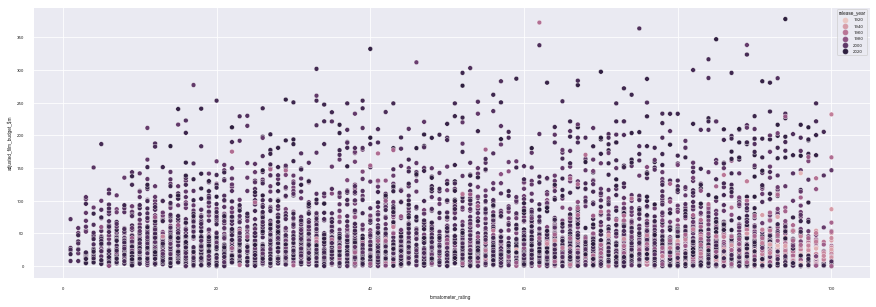

In [211]:
overall_rt_performance_scatterplot = sns.scatterplot(x='tomatometer_rating',y='adjusted_film_budget_$m', data=production_rt_file, hue='release_year',)
sns.set(rc={'figure.figsize':(15,5)})
sns.set_context("paper", font_scale=0.5)
fig7 = overall_rt_performance_scatterplot.get_figure()
fig7.savefig("overall_scatter_rt_performance.jpg")

Again, there appears to be a large group of low to mid budget films group along all RT % scores and dispersal does not occur until the budget costs increase. From the plot above, there are a group of movies which cost over 200m that scored less than 20% on Rotten Tomatoes and a potential handful of 300m+ movies that failed to hit 50%

In [212]:
## Waterworld and Spiderman 3 return from the IMDB list while Superman Returns drops off, Cleopatra, Justice League, POTC: OST and DMC join them in movies over 300m which score under 65%

production_rt_file[(production_rt_file['adjusted_film_budget_$m'] > 300) & (production_rt_file['tomatometer_rating'] < 65)].sort_values("$m_per_rt_percent", ascending=False).head(10)

,release_year,film_title,adjusted_film_budget_$m,tomatometer_status,tomatometer_rating,budget_category,$m_per_rt_percent
82,2011.0,PIRATES OF THE CARIBBEAN: ON STRANGER TIDES,301.69,Rotten,33.0,Premium,9.14
5140,2017.0,JUSTICE LEAGUE,332.19,Rotten,40.0,Premium,8.30
248,1995.0,WATERWORLD,311.65,Rotten,46.0,Premium,6.78
10008,1963.0,CLEOPATRA,372.51,Fresh,62.0,Premium,6.01
130,2006.0,PIRATES OF THE CARIBBEAN: DEAD MAN'S CHEST,302.90,Rotten,53.0,Premium,5.72
122,2007.0,SPIDER-MAN 3,337.78,Fresh,62.0,Premium,5.45


In [213]:
## The below list shows the movies costing more than 200m that have scored less than 60% on Rotten Tomatoes. More familiar titles on here...

production_rt_file[(production_rt_file['adjusted_film_budget_$m'] > 200) & (production_rt_file['tomatometer_rating'] < 60)].sort_values("$m_per_rt_percent", ascending=False).head(10)

,release_year,film_title,adjusted_film_budget_$m,tomatometer_status,tomatometer_rating,budget_category,$m_per_rt_percent
2122,1997.0,BATMAN & ROBIN,211.37,Rotten,11.0,Premium,19.22
2407,1999.0,WILD WILD WEST,276.94,Rotten,17.0,Premium,16.29
5157,2017.0,TRANSFORMERS: THE LAST KNIGHT,240.28,Rotten,15.0,Premium,16.02
212,1998.0,GODZILLA,216.45,Rotten,15.0,Premium,14.43
3182,2004.0,ALEXANDER,222.69,Rotten,16.0,Premium,13.92
50,2014.0,TRANSFORMERS: AGE OF EXTINCTION,240.79,Rotten,18.0,Premium,13.38
4581,2013.0,47 RONIN,203.84,Rotten,16.0,Premium,12.74
103,2009.0,TRANSFORMERS: REVENGE OF THE FALLEN,253.05,Rotten,20.0,Premium,12.65
3683,2007.0,EVAN ALMIGHTY,229.11,Rotten,23.0,Premium,9.96
10018,2019.0,DARK PHOENIX,212.28,Rotten,22.0,Premium,9.65


In [214]:
production_rt_file.corr().loc['adjusted_film_budget_$m','tomatometer_rating']

-0.04381936600149368

Of the three correlation coeffieints, this is the first one to be negatively correlated which would suggest that budget spend and critical response would move in opposite directions but the figure is so small, like with the IMDB scores, that it is more accurate to say there is little to no corelation. 

I will investigate further by looking at the premium and low budget production films

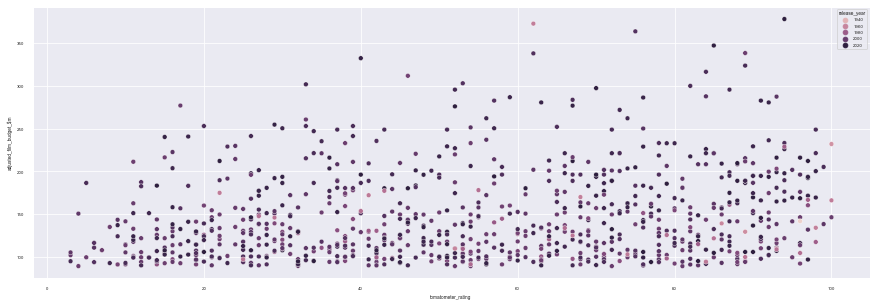

In [215]:
premium_budget_rt_data = production_rt_file[production_rt_file['budget_category'] == 'Premium']

premium_budget_rt_scatterplot = sns.scatterplot(x='tomatometer_rating',y='adjusted_film_budget_$m', data=premium_budget_rt_data, hue='release_year')
sns.set(rc={'figure.figsize':(15,5)})
sns.set_context("paper", font_scale=0.5)
fig10 = premium_budget_rt_scatterplot.get_figure()
fig10.savefig("premium_budget_scatter_rt.jpg")

In [216]:
premium_budget_rt_data.corr().loc['adjusted_film_budget_$m','tomatometer_rating']

0.20158045175695738

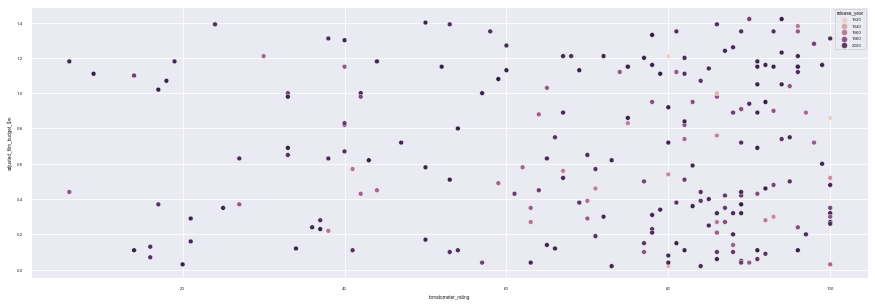

In [217]:
low_budget_rt_data = production_rt_file[production_rt_file['budget_category'] == 'Low_Budget']

low_budget_rt_scatterplot = sns.scatterplot(x='tomatometer_rating',y='adjusted_film_budget_$m', data=low_budget_rt_data, hue='release_year')
sns.set(rc={'figure.figsize':(15,5)})
sns.set_context("paper", font_scale=0.5)
fig11 = low_budget_rt_scatterplot.get_figure()
fig11.savefig("low_budget_scatter_rt.jpg")

In [218]:
low_budget_rt_data.corr().loc['adjusted_film_budget_$m','tomatometer_rating']

0.01007871244017102

While the overall correlation between the Rotten Tomatoes score and the production budget spend is slightly negatively correlated, it becomes positively correlated when we filter for premium and low budget films. Although the figure is so small that there is no real correlation despite the premium films breaching the 0.2 mark.

In [219]:
rt_score_by_year = production_rt_file.groupby('release_year')['tomatometer_rating'].agg(['sum','count','mean','median']).reset_index()

In [220]:
rt_score_by_year

,release_year,sum,count,mean,median
0,1915.0,93.0,1,93.000000,93.0
1,1916.0,97.0,1,97.000000,97.0
2,1920.0,80.0,1,80.000000,80.0
3,1921.0,100.0,1,100.000000,100.0
4,1922.0,100.0,1,100.000000,100.0
...,...,...,...,...,...
96,2016.0,10496.0,192,54.666667,57.0
97,2017.0,8051.0,149,54.033557,52.0
98,2018.0,7867.0,133,59.150376,62.0
99,2019.0,6907.0,114,60.587719,62.5


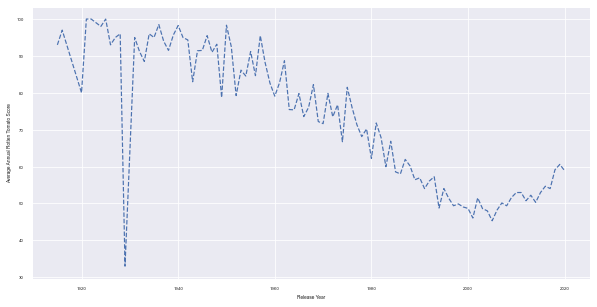

In [221]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(rt_score_by_year['release_year'], rt_score_by_year['mean'], linestyle = '--', color = 'b')
plt.rcParams.update({'font.size': 500})
ax.set_xlabel("Release Year")
ax.set_ylabel("Average Annual Rotten Tomato Score")
fig.savefig("avg_rt_score_by_year.jpg")
plt.show()

In a simliar trend to the IMDB chart, there is a downward trend for newer movies. This may be due to the increase in number of movies or an actual decline in critical reception. I seems to be trending upward as we approach the current decade which may be worth keeping an eye on. 

In [222]:
## creating a table similar to the one I created for the financial and IMDB data to see if specific budget categories perform better in the eyes of critics

critical_reception = (production_rt_file.groupby(['budget_category','tomatometer_status'], sort = False).size().unstack(fill_value = 0).reset_index()
                        .rename_axis(None, axis=0))

In [223]:
critical_reception

tomatometer_status,budget_category,Certified-Fresh,Rotten,Fresh
0,Premium,255,487,139
1,Expensive,348,955,310
2,Economical,183,273,191
3,Mid_Range,283,756,347
4,Inexpensive,325,514,257
5,Low_Budget,79,58,77


In [224]:
critical_reception['rotten_%'] = round(critical_reception['Rotten']/(critical_reception['Rotten']
                                        +critical_reception['Fresh']+critical_reception['Certified-Fresh'])*100,2)
critical_reception['fresh_%'] = 100 - critical_reception['rotten_%']

In [225]:
critical_reception

tomatometer_status,budget_category,Certified-Fresh,Rotten,Fresh,rotten_%,fresh_%
0,Premium,255,487,139,55.28,44.72
1,Expensive,348,955,310,59.21,40.79
2,Economical,183,273,191,42.19,57.81
3,Mid_Range,283,756,347,54.55,45.45
4,Inexpensive,325,514,257,46.90,53.10
5,Low_Budget,79,58,77,27.10,72.90


The obvious standout from this table that over 70% over the low budget movies fall into fresh categories while over half of both Premium and Expensive films fall into the rotten categories. 

This tells me, or confirms to me, that critics tend to favour lower budget productions over expensively assembled films. There tends to be snobbery in the film critic media towards big productions and this report goes further to cement that in my mind although I'm not saying that they are wrong in their opinions as I would trust the critical reviews in The Guardian or Little White Lies over the scores provided by people on IMDB. Yet when it comes to big blockbuster movies, knowing the bias in critics, I may tend to trust the IMDB scores more in the future.

Aside from confirming the critic bias, I believe that the analysis completed in this report may not prove any links between audience or critical reception and production costs, I do believe that there is a link between how much a film costs and there is less chance of a film making a loss if costs are either extremely low or you're given a Marvel level budget but you take more risk falling in between those huge ranges. 

## 8. Pick a film - One last thing, for ease of access, enter the title of a film (in caps) into the film_title to pull out key information from the above analysis for the title of your choosing

In [226]:
columns_to_subset12 = ['release_year','film_title','adjusted_film_budget_$m','adjusted_film_gross_$m','budget_category','film_profitability'] 
columns_to_subset13 = ['release_year','film_title','imdb_score','audience_reception']
columns_to_subset14 = ['release_year','film_title','tomatometer_rating','tomatometer_status']
pick_budget_gross = film_financial_data[columns_to_subset12]
pick_budget_imdb = production_imdb_file[columns_to_subset13]
pick_budget_rt = production_rt_file[columns_to_subset14]

In [227]:
film_title = 'THE WARRIORS'
pick_a_movie_budget_vs_gross = pick_budget_gross[pick_budget_gross["film_title"].str.contains(film_title)].set_index('release_year')
pick_a_movie_budget_vs_imdb = pick_budget_imdb[pick_budget_imdb["film_title"].str.contains(film_title)].set_index('release_year')
pick_a_movie_budget_vs_rt = pick_budget_rt[pick_budget_rt["film_title"].str.contains(film_title)].set_index('release_year')
pick_a_movie_files = pd.DataFrame({'pick': ['pick_a_movie_budget_vs_gross','pick_a_movie_budget_vs_imdb','pick_a_movie_budget_vs_rt']})

In [228]:
for index, row in pick_a_movie_files.iterrows():
    print(row['pick'])
    exec('print('+row['pick']+'.head(20))')

pick_a_movie_budget_vs_gross
                film_title  adjusted_film_budget_$m  adjusted_film_gross_$m  \
release_year                                                                  
1979.0        THE WARRIORS                    14.95                   84.07   

             budget_category film_profitability  
release_year                                     
1979.0           Inexpensive         Profitable  
pick_a_movie_budget_vs_imdb
                film_title  imdb_score audience_reception
release_year                                             
1979.0        THE WARRIORS         7.6      Above Average
pick_a_movie_budget_vs_rt
                film_title  tomatometer_rating tomatometer_status
release_year                                                     
1979.0        THE WARRIORS                90.0              Fresh
